### Steps followed in Stock Market Analysis

**1.Business Case**

**2.Preliminary Steps - Data loading and cleaning**

**3.Data Exploration and Visualisation**

**4.Stock Analysis and Portfolio Management - CAPM**

**5.Stock Price Prediction - Validation**

**6.Reporting**

### 1. Business Case :

Ms. Alexandra Kolishnyick, daughter of a renowned Ukrainian business tycoon is a potential client. Ms. Kolishnyick is a reserved and conservative individual, valuing simplicity and humble living. Having primarily received her education in the US, she's currently excelling academically and harbors aspirations of attending an Ivy League college for her Bachelor's degree. Furthermore, she intends to establish an NGO with her peers, focused on supporting the sub-Saharan African region, a cause emotionally significant to her and supported by her family. Financially, she has substantial savings accumulated from her parents' support for daily expenses, yet she adamantly refuses further financial aid for her NGO, aiming to invest her savings during college to fund the initiative upon maturity.

#### As a portfolio manager, our task is to analyse the performance of the stocks in various sectors and propose the stocks which meet the investment criteria of Alexa. She should be able to reach her financial goals with the investment.



### 2.Preliminary Steps - Data loading and cleaning

### 2.1 Importing the required libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np


# importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# importing library to build model
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests,adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy.stats import boxcox
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# setting display options
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

### 2.2 Reading and Understanding the data

In [2]:
# Create dataframes for the csv files.There are 12 stocks and one index to be considered.
AAL_df=pd.read_csv("AAL.csv")
ALK_df=pd.read_csv("ALK.csv")
HA_df=pd.read_csv("HA.csv")
CS_df=pd.read_csv("CS.csv")
DB_df=pd.read_csv("DB.csv")
GS_df=pd.read_csv("GS.csv")
JNJ_df=pd.read_csv("JNJ.csv")
MRK_df=pd.read_csv("MRK.csv")
BHC_df=pd.read_csv("BHC.csv")
AAPL_df=pd.read_csv("AAPL.csv")
AMZN_df=pd.read_csv("AMZN.csv")
GOOG_df=pd.read_csv("GOOG.csv")
SP500_df=pd.read_csv("S&P500.csv")

In [3]:
# Let us check the shape of each of the dataframes

print("Shape of AAL :",AAL_df.shape)
print("Shape of ALK :",ALK_df.shape)
print("Shape of HA :",HA_df.shape)
print("Shape of CS :",CS_df.shape)
print("Shape of DB :",DB_df.shape)
print("Shape of GS :",GS_df.shape)
print("Shape of JNJ :",JNJ_df.shape)
print("Shape of MRK :",MRK_df.shape)
print("Shape of BHC :",BHC_df.shape)
print("Shape of AAPL :",AAPL_df.shape)
print("Shape of AMZN :",AMZN_df.shape)
print("Shape of GOOG :",GOOG_df.shape)
print("Shape of SP500 :",SP500_df.shape)

Shape of AAL : (2517, 7)
Shape of ALK : (2524, 7)
Shape of HA : (2524, 7)
Shape of CS : (2712, 7)
Shape of DB : (2712, 7)
Shape of GS : (2712, 7)
Shape of JNJ : (2525, 7)
Shape of MRK : (2525, 7)
Shape of BHC : (2525, 7)
Shape of AAPL : (2517, 7)
Shape of AMZN : (2524, 7)
Shape of GOOG : (2524, 7)
Shape of SP500 : (2517, 7)


In [4]:
# All Dataframes have 7 columns however the number of rows in each dataframe varies

### 2.2 Missing Value Treatment

In [5]:
# Let us check for missing values in each dataframe
# Check for missing values for AAL stock
if sum(AAL_df.isnull().sum())==0:
    print("AAL  : No missing values")
else:
    print("AAL  : Missing values found")

# Check for missing values for ALK stock
if sum(ALK_df.isnull().sum())==0:
    print("ALK  : No missing values")
else:
    print("ALK  : Missing values found")
    
# Check for missing values for HA stock   
if sum(HA_df.isnull().sum())==0:
    print("HA   : No missing values")
else:
    print("HA   : Missing values found")
    
    
# Check for missing values for CS stock   
if sum(CS_df.isnull().sum())==0:
    print("CS   : No missing values")
else:
    print("CS   : Missing values found")

    
# Check for missing values for DB stock   
if sum(DB_df.isnull().sum())==0:
    print("DB   : No missing values")
else:
    print("DB   : Missing values found")
    
    
# Check for missing values for GS stock   
if sum(GS_df.isnull().sum())==0:
    print("GS   : No missing values")
else:
    print("GS   : Missing values found")
    
# Check for missing values for JNJ stock   
if sum(JNJ_df.isnull().sum())==0:
    print("JNJ  : No missing values")
else:
    print("JNJ  : Missing values found")
    
# Check for missing values for MRK stock   
if sum(MRK_df.isnull().sum())==0:
    print("MRK  : No missing values")
else:
    print("MRK  : Missing values found")
    
# Check for missing values for BHC stock   
if sum(BHC_df.isnull().sum())==0:
    print("BHC  : No missing values")
else:
    print("BHC  : Missing values found")
    
# Check for missing values for AAPL stock   
if sum(AAPL_df.isnull().sum())==0:
    print("AAPL : No missing values")
else:
    print("AAPL : Missing values found")
    
# Check for missing values for AMZN stock   
if sum(AMZN_df.isnull().sum())==0:
    print("AMZN : No missing values")
else:
    print("AMZN : Missing values found")
    
# Check for missing values for GOOG stock   
if sum(GOOG_df.isnull().sum())==0:
    print("GOOG : No missing values")
else:
    print("GOOG : Missing values found")
    
# Check for missing values for SP500 stock   
if sum(SP500_df.isnull().sum())==0:
    print("SP500: No missing values")
else:
    print("SP500: Missing values found")


AAL  : No missing values
ALK  : Missing values found
HA   : Missing values found
CS   : Missing values found
DB   : Missing values found
GS   : Missing values found
JNJ  : Missing values found
MRK  : Missing values found
BHC  : Missing values found
AAPL : No missing values
AMZN : Missing values found
GOOG : Missing values found
SP500: No missing values


In [6]:
# Let us the look at the records of missing values for ALK
ALK_df[ALK_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [7]:
# Let us the look at the records of missing values for HA
HA_df[HA_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [8]:
# Let us the look at the records of missing values for CS
CS_df[CS_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [9]:
# Let us the look at the records of missing values for DB
DB_df[DB_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [10]:
# Let us the look at the records of missing values for GS
GS_df[GS_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [11]:
# Let us the look at the records of missing values for JNJ
JNJ_df[JNJ_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2524  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [12]:
# Let us the look at the records of missing values for MRK
MRK_df[MRK_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2524  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [13]:
# Let us the look at the records of missing values for BHC
BHC_df[BHC_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2524  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [14]:
# Let us the look at the records of missing values for AMZN
AMZN_df[AMZN_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN

In [15]:
# Let us the look at the records of missing values for GOOG
GOOG_df[GOOG_df["Date"].isnull()]

Date  Open  High  Low  Close  Adj Close  Volume
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN

### Observation:

The missng values in all the dataframes can be dropped as the entire row has missing values

In [16]:
# Drpping the rows with null values from the dataframes
ALK_df.dropna(axis=0,how="all",inplace=True)
HA_df.dropna(axis=0,how="all",inplace=True)
CS_df.dropna(axis=0,how="all",inplace=True)
DB_df.dropna(axis=0,how="all",inplace=True)
GS_df.dropna(axis=0,how="all",inplace=True)
JNJ_df.dropna(axis=0,how="all",inplace=True)
MRK_df.dropna(axis=0,how="all",inplace=True)
BHC_df.dropna(axis=0,how="all",inplace=True)
AMZN_df.dropna(axis=0,how="all",inplace=True)
GOOG_df.dropna(axis=0,how="all",inplace=True)

### 2.3 Data Cleaning

In [17]:
# Let us check the the format of the variables in the dataframe
print("AAL:")
print(AAL_df.info())
print("*"*50)
print("\n")

print("ALK:")
print(ALK_df.info())
print("*"*50)
print("\n")

print("HA:")
print(HA_df.info())
print("*"*50)
print("\n")

print("CS:")
print(CS_df.info())
print("*"*50)
print("\n")


print("DB:")
print(DB_df.info())
print("*"*50)
print("\n")

print("GS:")
print(GS_df.info())
print("*"*50)
print("\n")

print("JNJ:")
print(JNJ_df.info())
print("*"*50)
print("\n")

print("MRK:")
print(MRK_df.info())
print("*"*50)
print("\n")

print("BHC:")
print(BHC_df.info())
print("*"*50)
print("\n")

print("AAPL:")
print(AAPL_df.info())
print("*"*50)
print("\n")

print("AMZN:")
print(AMZN_df.info())
print("*"*50)
print("\n")

print("GOOG:")
print(GOOG_df.info())
print("*"*50)
print("\n")

print("SP500:")
print(SP500_df.info())
print("*"*50)
print("\n")






AAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
**************************************************


ALK:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  

### Observation

1. The variable "Date" in all Dataframes is in object format. This needs to be converted to date format.
2. All dataframes except CS,DB and GS have 2517 records
3.There are 2705 records in the dataframes of Banking sector -CS,DB and GS.

#### Date formatting

In [18]:
# Let us check a couple of records to check the date format in each dataframe
print(AAL_df.head(2)),
print("*"*100)
print(ALK_df.head(2))
print("*"*100)
print(HA_df.head(2))
print("*"*100)
print(CS_df.head(2))
print("*"*100)
print(DB_df.head(2))
print("*"*100)
print(GS_df.head(2))
print("*"*100)
print(JNJ_df.head(2))
print("*"*100)
print(MRK_df.head(2))
print("*"*100)
print(BHC_df.head(2))
print("*"*100)
print(AAPL_df.head(2))
print("*"*100)
print(AMZN_df.head(2))
print("*"*100)
print(GOOG_df.head(2))
print("*"*100)
print(SP500_df.head(2))
print("*"*100)


         Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
****************************************************************************************************
         Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
****************************************************************************************************
         Date  Open  High   Low  Close  Adj Close    Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526  645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189  618900.0
****************************************************************************************************
         Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.76562

In [19]:
# Converting Date in each dataframe into Date format
AAL_df["Date"]=pd.to_datetime(AAL_df.Date,format="%d-%m-%Y")
ALK_df["Date"]=pd.to_datetime(ALK_df.Date,format="%d-%m-%Y")
HA_df["Date"]=pd.to_datetime(HA_df.Date,format="%d-%m-%Y")
CS_df["Date"]=pd.to_datetime(CS_df.Date,format="%d-%m-%Y")
DB_df["Date"]=pd.to_datetime(DB_df.Date,format="%d-%m-%Y")
GS_df["Date"]=pd.to_datetime(GS_df.Date,format="%d-%m-%Y")
JNJ_df["Date"]=pd.to_datetime(JNJ_df.Date,format="%d-%m-%Y")
MRK_df["Date"]=pd.to_datetime(MRK_df.Date,format="%d-%m-%Y")
BHC_df["Date"]=pd.to_datetime(BHC_df.Date,format="%d-%m-%Y")
AAPL_df["Date"]=pd.to_datetime(AAPL_df.Date,format="%d-%m-%Y")
AMZN_df["Date"]=pd.to_datetime(AMZN_df.Date,format="%d-%m-%Y")
GOOG_df["Date"]=pd.to_datetime(GOOG_df.Date,format="%d-%m-%Y")
SP500_df["Date"]=pd.to_datetime(SP500_df.Date,format="%d-%m-%Y")


#### Date slicing

In [20]:
print("AAL Stock Date Range  :",AAL_df["Date"].min(),"-",AAL_df["Date"].max())
print("ALK Stock Date Range  :",ALK_df["Date"].min(),"-",ALK_df["Date"].max())
print("HA Stock Date Range   :",HA_df["Date"].min(),"-",HA_df["Date"].max())
print("CS Stock Date Range   :",CS_df["Date"].min(),"-",CS_df["Date"].max())
print("DB Stock Date Range   :",DB_df["Date"].min(),"-",DB_df["Date"].max())
print("GS Stock Date Range   :",GS_df["Date"].min(),"-",GS_df["Date"].max())
print("JNJ Stock Date Range  :",JNJ_df["Date"].min(),"-",JNJ_df["Date"].max())
print("MRK Stock Date Range  :",MRK_df["Date"].min(),"-",MRK_df["Date"].max())
print("BHC Stock Date Range  :",BHC_df["Date"].min(),"-",BHC_df["Date"].max())
print("AAPL Stock Date Range :",AAPL_df["Date"].min(),"-",AAPL_df["Date"].max())
print("AMZN Stock Date Range :",AMZN_df["Date"].min(),"-",AMZN_df["Date"].max())
print("GOOG Stock Date Range :",GOOG_df["Date"].min(),"-",GOOG_df["Date"].max())
print("SP500 Stock Date Range :",SP500_df["Date"].min(),"-",SP500_df["Date"].max())


AAL Stock Date Range  : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
ALK Stock Date Range  : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
HA Stock Date Range   : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
CS Stock Date Range   : 2010-01-04 00:00:00 - 2020-09-30 00:00:00
DB Stock Date Range   : 2010-01-04 00:00:00 - 2020-09-30 00:00:00
GS Stock Date Range   : 2010-01-04 00:00:00 - 2020-09-30 00:00:00
JNJ Stock Date Range  : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
MRK Stock Date Range  : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
BHC Stock Date Range  : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
AAPL Stock Date Range : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
AMZN Stock Date Range : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
GOOG Stock Date Range : 2010-10-01 00:00:00 - 2020-09-30 00:00:00
SP500 Stock Date Range : 2010-10-01 00:00:00 - 2020-09-30 00:00:00


### Observation

The period of stock price analysis is from 2010-10-01 to 2020-09-30. 
Since the Banking sector stocks have the start date as 2010-01-04, we will drop the records prior to 2010-10-01 in the same

In [21]:
# Slice the dataframe of CS,DB and GS to have records with date on or after 2010-10-01.
CS_df=CS_df[CS_df["Date"]>="2010-10-01"]
DB_df=DB_df[DB_df["Date"]>="2010-10-01"]
GS_df=GS_df[GS_df["Date"]>="2010-10-01"]

CS_df.shape,DB_df.shape,GS_df.shape

((2517, 7), (2517, 7), (2517, 7))

#### Dropping columns

In [22]:
# Let us delete the columns that are not required for the purpose of analysis and model building
AAL_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
ALK_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
HA_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
CS_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
DB_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
GS_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
JNJ_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
MRK_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
BHC_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
AAPL_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
AMZN_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
GOOG_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)
SP500_df.drop(['Open', 'High', 'Low','Adj Close'],axis=1,inplace=True)

#### Renaming columns

In [23]:
# The columns are renamed to reflect the Industry and Company.
AAL_df.rename(columns={"Close":"Aviation_American_Price","Volume":"Aviation_American_Volume"},inplace=True)
ALK_df.rename(columns={"Close":"Aviation_Alaska_Price","Volume":"Aviation_Alaska_Volume"},inplace=True)
HA_df.rename(columns={"Close":"Aviation_Hawaian_Price","Volume":"Aviation_Hawaian_Volume"},inplace=True)
CS_df.rename(columns={"Close":"Fin_CreditSuisse_Price","Volume":"Fin_CreditSuisse_Volume"},inplace=True)
DB_df.rename(columns={"Close":"Fin_DeutscheBank_Price","Volume":"Fin_DeutscheBank_Volume"},inplace=True)
GS_df.rename(columns={"Close":"Fin_GoldmanSachs_Price","Volume":"Fin_GoldmanSachs_Volume"},inplace=True)
JNJ_df.rename(columns={"Close":"Health_J&J_Price","Volume":"Health_J&J_Volume"},inplace=True)
MRK_df.rename(columns={"Close":"Health_Merck_Price","Volume":"Health_Merck_Volume"},inplace=True)
BHC_df.rename(columns={"Close":"Health_Bausch_Price","Volume":"Health_Bausch_Volume"},inplace=True)
AAPL_df.rename(columns={"Close":"Tech_Apple_Price","Volume":"Tech_Apple_Volume"},inplace=True)
AMZN_df.rename(columns={"Close":"Tech_Amazon_Price","Volume":"Tech_Amazon_Volume"},inplace=True)
GOOG_df.rename(columns={"Close":"Tech_Google_Price","Volume":"Tech_Google_Volume"},inplace=True)
SP500_df.rename(columns={"Close":"Index_SP500_Price","Volume":"Index_SP500_Volume"},inplace=True)



#### Setting Index

In [24]:
# Seeting date as the index
AAL_df=AAL_df.set_index("Date")
ALK_df=ALK_df.set_index("Date")
HA_df=HA_df.set_index("Date")
CS_df=CS_df.set_index("Date")
DB_df=DB_df.set_index("Date")
GS_df=GS_df.set_index("Date")
JNJ_df=JNJ_df.set_index("Date")
MRK_df=MRK_df.set_index("Date")
BHC_df=BHC_df.set_index("Date")
AAPL_df=AAPL_df.set_index("Date")
AMZN_df=AMZN_df.set_index("Date")
GOOG_df=GOOG_df.set_index("Date")
SP500_df=SP500_df.set_index("Date")


#### Merging Dataframes

In [25]:
# To merge dataframes into one, let us first create a list of the dataframes
df_list=[AAL_df,ALK_df,HA_df,CS_df,DB_df,GS_df,JNJ_df,MRK_df,BHC_df,AAPL_df,AMZN_df,GOOG_df,SP500_df]

from functools import reduce

merged_df=reduce(lambda left,right:pd.merge(left,right,on=["Date"],how="outer"),df_list)
merged_df.head()

Aviation_American_Price  Aviation_American_Volume  \
Date                                                            
2010-10-01                     9.29                   3603800   
2010-10-04                     9.12                   3856800   
2010-10-05                     9.23                   3896600   
2010-10-06                     9.23                   3230200   
2010-10-07                     9.24                   3877700   

            Aviation_Alaska_Price  Aviation_Alaska_Volume  \
Date                                                        
2010-10-01                12.4475               1663600.0   
2010-10-04                12.1425               1512400.0   
2010-10-05                12.2150               2567200.0   
2010-10-06                12.1875               1043600.0   
2010-10-07                11.6250               7682400.0   

            Aviation_Hawaian_Price  Aviation_Hawaian_Volume  \
Date                                                          
2010-10-01                    5.96                 645400.0   
2010-10-04                    5.75                 618900.0   
2010-10-05                    5.85                 534800.0   
2010-10-06                    5.97                2563900.0   
2010-10-07                    6.15                1115200.0   

            Fin_CreditSuisse_Price  Fin_CreditSuisse_Volume  \
Date                                                          
2010-10-01               42.226563                1814900.0   
2010-10-04               41.914063                1085600.0   
2010-10-05               43.154297                1025300.0   
2010-10-06               43.437500                 871300.0   
2010-10-07               43.671875                1377000.0   

            Fin_DeutscheBank_Price  Fin_DeutscheBank_Volume  \
Date                                                          
2010-10-01               52.595421                2010600.0   
2010-10-04               51.755726                1245600.0   
2010-10-05               53.950382                2270900.0   
2010-10-06               54.608780                1887400.0   
2010-10-07               54.036259                1191000.0   

            Fin_GoldmanSachs_Price  Fin_GoldmanSachs_Volume  Health_J&J_Price  \
Date                                                                            
2010-10-01              147.699997                7439800.0         61.750000   
2010-10-04              146.570007                5866700.0         61.669998   
2010-10-05              149.570007                8724700.0         62.799999   
2010-10-06              150.839996                6330600.0         63.209999   
2010-10-07              151.110001                4471500.0         63.220001   

            Health_J&J_Volume  Health_Merck_Price  Health_Merck_Volume  \
Date                                                                     
2010-10-01          9773200.0           36.599998           11741900.0   
2010-10-04          8703600.0           36.520000            9234900.0   
2010-10-05         12439400.0           37.020000           10669200.0   
2010-10-06         11339800.0           37.009998            7541300.0   
2010-10-07          9826600.0           36.709999           13897800.0   

            Health_Bausch_Price  Health_Bausch_Volume  Tech_Apple_Price  \
Date                                                                      
2010-10-01            25.750000             5778700.0         10.090000   
2010-10-04            25.870001             4187200.0          9.951428   
2010-10-05            26.299999             4610300.0         10.319285   
2010-10-06            26.690001             4448900.0         10.328215   
2010-10-07            26.600000             2453900.0         10.329286   

            Tech_Apple_Volume  Tech_Amazon_Price  Tech_Amazon_Volume  \
Date                                                                   
2010-10-01          448142800         153.710

In [26]:
# Let us check the shape of the merged dataframe
merged_df.shape

(2517, 26)

In [27]:
# The merged dataframe has no null values, date is in the index and all values are in number format as required.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aviation_American_Price   2517 non-null   float64
 1   Aviation_American_Volume  2517 non-null   int64  
 2   Aviation_Alaska_Price     2517 non-null   float64
 3   Aviation_Alaska_Volume    2517 non-null   float64
 4   Aviation_Hawaian_Price    2517 non-null   float64
 5   Aviation_Hawaian_Volume   2517 non-null   float64
 6   Fin_CreditSuisse_Price    2517 non-null   float64
 7   Fin_CreditSuisse_Volume   2517 non-null   float64
 8   Fin_DeutscheBank_Price    2517 non-null   float64
 9   Fin_DeutscheBank_Volume   2517 non-null   float64
 10  Fin_GoldmanSachs_Price    2517 non-null   float64
 11  Fin_GoldmanSachs_Volume   2517 non-null   float64
 12  Health_J&J_Price          2517 non-null   float64
 13  Health_J&J_Volume         2517 non-null   flo

#### Exporting the merged datframe to excel

In [28]:
# Lets store the name of the file in a variable
file_name="stocks_merged_data.xlsx"

# saving the file to excel
merged_df.to_excel(file_name)
print("Data Frame is written to excel file successfully")

Data Frame is written to excel file successfully


#### Rearranging the columns

In [29]:
# Rearranging the columns to have prices of stocks and index and volume of stocks and index together
merged_df=merged_df.loc[:,['Aviation_American_Price','Aviation_Alaska_Price','Aviation_Hawaian_Price',
                           'Fin_CreditSuisse_Price','Fin_DeutscheBank_Price','Fin_GoldmanSachs_Price',
                           'Health_J&J_Price','Health_Merck_Price','Health_Bausch_Price',
                           'Tech_Apple_Price','Tech_Amazon_Price','Tech_Google_Price','Index_SP500_Price',
                           'Aviation_American_Volume','Aviation_Alaska_Volume','Aviation_Hawaian_Volume',
                           'Fin_CreditSuisse_Volume','Fin_DeutscheBank_Volume','Fin_GoldmanSachs_Volume',
                           'Health_J&J_Volume','Health_Merck_Volume','Health_Bausch_Volume',
                           'Tech_Apple_Volume','Tech_Amazon_Volume','Tech_Google_Volume','Index_SP500_Volume']]

#### Categorising the variables

In [30]:
# Let us categorize the stock prices and volume based on the industry
Aviation_Prices=['Aviation_American_Price','Aviation_Alaska_Price','Aviation_Hawaian_Price']
Finance_Prices=['Fin_CreditSuisse_Price','Fin_DeutscheBank_Price','Fin_GoldmanSachs_Price']
Health_Prices=['Health_J&J_Price','Health_Merck_Price','Health_Bausch_Price']
Tech_Prices=['Tech_Apple_Price','Tech_Amazon_Price','Tech_Google_Price']
Index_Price=['Index_SP500_Price']

Aviation_Volume=['Aviation_American_Volume','Aviation_Alaska_Volume','Aviation_Hawaian_Volume']
Finance_Volume=['Fin_CreditSuisse_Volume','Fin_DeutscheBank_Volume','Fin_GoldmanSachs_Volume']
Health_Volume=['Health_J&J_Volume','Health_Merck_Volume','Health_Bausch_Volume']
Tech_Volume=['Tech_Apple_Volume','Tech_Amazon_Volume','Tech_Google_Volume']
Index_Volume=['Index_SP500_Volume']

### 2.3 Outliers 

In [31]:
# let us check the summary statistics for all prices and volume
merged_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).round(2)

Aviation_American_Price  Aviation_Alaska_Price  Aviation_Hawaian_Price  \
count                  2517.00                2517.00                 2517.00   
mean                     29.40                  50.03                   22.87   
std                      15.21                  24.19                   15.48   
min                       4.00                  11.62                    3.78   
25%                      13.01                  26.78                    7.03   
50%                      32.52                  58.54                   21.91   
75%                      42.20                  67.26                   36.90   
90%                      48.52                  79.97                   45.74   
95%                      51.20                  87.25                   49.17   
99%                      54.31                  95.12                   56.23   
max                      58.47                 100.24                   60.30   

       Fin_CreditSuisse_Price  Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  \
count                 2517.00                 2517.00                 2517.00   
mean                    21.50                   27.30                  179.60   
std                      8.99                   15.41                   42.41   
min                      6.67                    5.48                   87.70   
25%                     13.74                   13.47                  154.99   
50%                     19.64                   28.37                  177.23   
75%                     27.75                   41.05                  211.58   
90%                     31.69                   47.34                  237.09   
95%                     40.62                   54.69                  245.80   
99%                     44.06                   59.19                  262.87   
max                     46.51                   62.62                  273.38   

       Health_J&J_Price  Health_Merck_Price  Health_Bausch_Price  \
count           2517.00             2517.00              2517.00   
mean             105.28               57.16                61.88   
std               28.17               15.16                57.17   
min               57.66               29.81                 8.51   
25%               81.93               45.73                22.17   
50%              104.04               57.18                38.76   
75%              130.98               64.09                90.27   
90%              140.77               81.37               139.43   
95%              146.26               84.34               202.71   
99%              150.51               89.09               239.43   
max              155.51               92.04               262.52   

       Tech_Apple_Price  Tech_Amazon_Price  Tech_Google_Price  \
count           2517.00            2517.00            2517.00   
mean              33.45             854.64             730.43   
std               20.63             745.20             364.69   
min                9.95             153.03             236.55   
25%               18.96             266.49             403.64   
50%               27.59             533.75             651.79   
75%               42.96            1500.00            1055.81   
90%               56.76            1883.97            1229.46   
95%               77.38            2137.87            1393.51   
99%              112.98            3162.04            1521.84   
max              134.18            3531.45            1728.28   

       Index_SP500_Price  Aviation_American_Volume  Aviation_Alaska_Volume  \
count            2517.00              2.517000e+03                 2517.00   
mean             2111.39              1.263146e+07              1648084.86   
std               612.23              2.149322e+07              1095121.29   
min              1099.23              1.158400e+06               270600.00   
25%              1562.17              5.368800e+06              1087600.0

In [32]:
# Prices of Bosch and Tech Prices seem to have big variation from 99% to max values.Let us visulaise the same with box plots

Boxplot of Aviation_American_Price


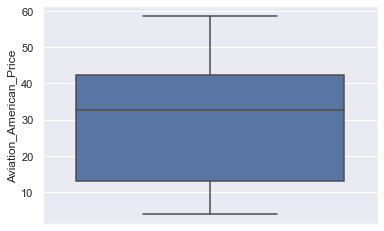

Boxplot of Aviation_Alaska_Price


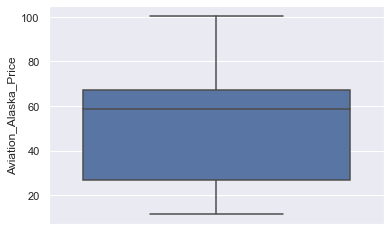

Boxplot of Aviation_Hawaian_Price


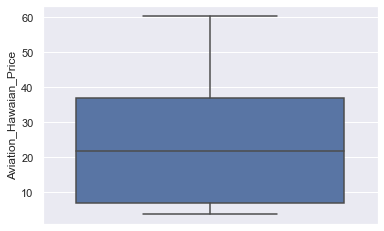

In [33]:
# Boxplot for aviation industry stocks
for i in Aviation_Prices:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Fin_CreditSuisse_Price


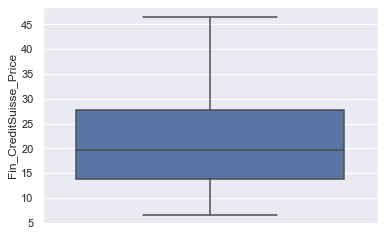

Boxplot of Fin_DeutscheBank_Price


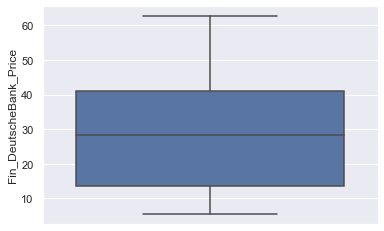

Boxplot of Fin_GoldmanSachs_Price


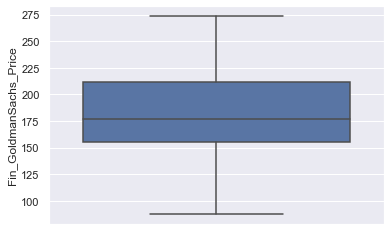

In [34]:
# Boxplot for Finance Industry stocks
for i in Finance_Prices:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Health_J&J_Price


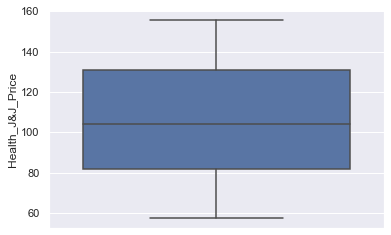

Boxplot of Health_Merck_Price


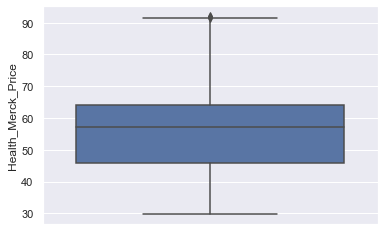

Boxplot of Health_Bausch_Price


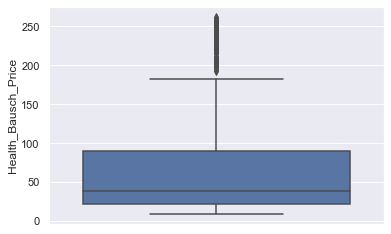

In [35]:
# Boxplot for Health and Pharma Stocks
for i in Health_Prices:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Tech_Apple_Price


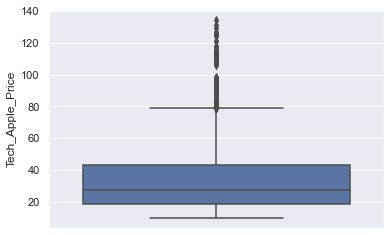

Boxplot of Tech_Amazon_Price


Boxplot of Tech_Google_Price


In [36]:
# Boxplot for Tech Stocks
for i in Tech_Prices:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Index_SP500_Price


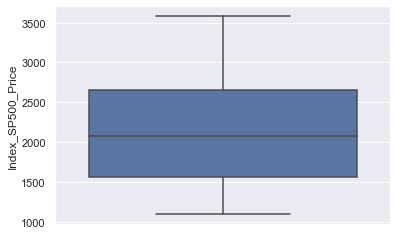

In [37]:
# Boxplot for Market Index S&P500
for i in Index_Price:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

In [38]:
# Let us use boxplot for volume data to check for outliers.

Boxplot of Aviation_American_Volume


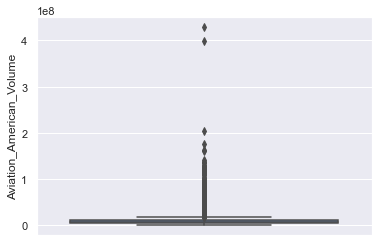

Boxplot of Aviation_Alaska_Volume


Boxplot of Aviation_Hawaian_Volume


In [39]:
# Boxplot for aviation industry stocks
for i in Aviation_Volume:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Fin_CreditSuisse_Volume


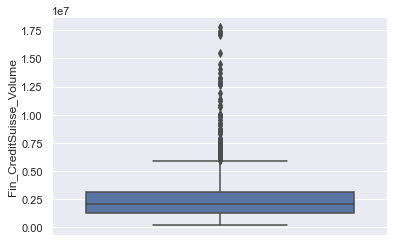

Boxplot of Fin_DeutscheBank_Volume


Boxplot of Fin_GoldmanSachs_Volume


In [40]:
# Boxplot for Finance Industry stocks
for i in Finance_Volume:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Health_J&J_Volume


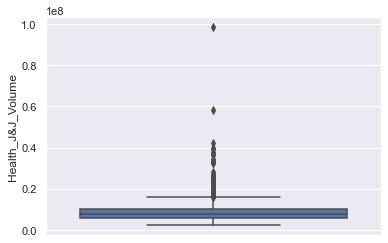

Boxplot of Health_Merck_Volume


Boxplot of Health_Bausch_Volume


In [41]:
# Boxplot for Health and Pharma Stocks
for i in Health_Volume:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Tech_Apple_Volume


Boxplot of Tech_Amazon_Volume


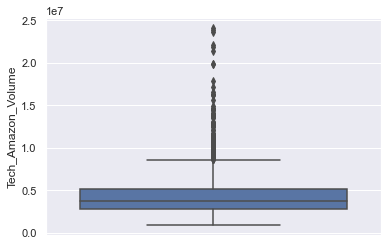

Boxplot of Tech_Google_Volume


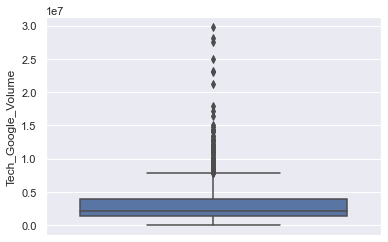

In [42]:
# Boxplot for Tech Stocks
for i in Tech_Volume:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

Boxplot of Index_SP500_Volume


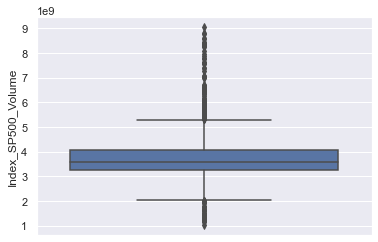

In [43]:
# Boxplot for Market Index S&P500
for i in Index_Volume:
    sns.boxplot(y=i,data=merged_df)
    print("Boxplot of", i)
    plt.ylabel(i)
    plt.show()

### Observation :

**Prices:**

**Aviation:** No outliers found

**Finance:** No outliers found

**Health and Pharma:** Outliers found in Merck and Bausch Health but it is continous.

**Technology:** Outliers found in Apple and Amazon but it is continous.



**Volume:**

There has been rise and fall in volume in all sectors and index.

**Conclusion :** No outlier treatment done on price and volume considering the nature of the analysis.The outliers are statistical whereas stock markets have such variations.

### 3. Data Exploration

### 3.1 Histogram and Dispersion from Mean

Histogram showing the spread of Aviation_American_Price and dispersion from mean


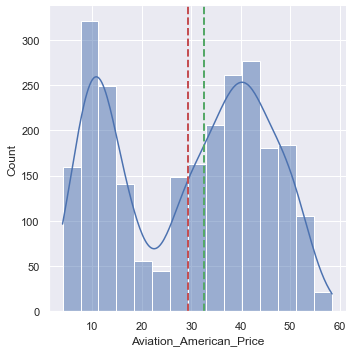

Histogram showing the spread of Aviation_Alaska_Price and dispersion from mean


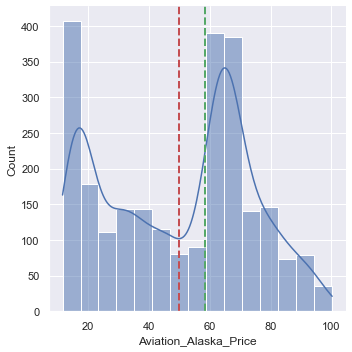

Histogram showing the spread of Aviation_Hawaian_Price and dispersion from mean


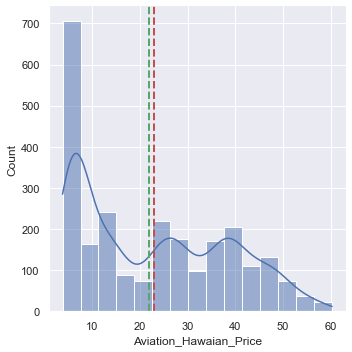

In [44]:
# Let us plot Histogram of prices of stocks from the aviation sector
for i in Aviation_Prices:
    sns.displot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Fin_CreditSuisse_Price and dispersion from mean


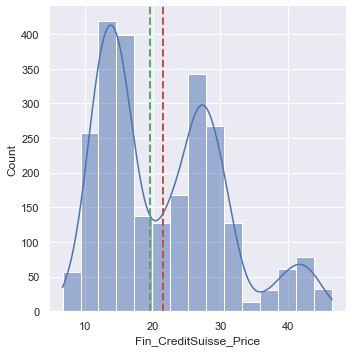

Histogram showing the spread of Fin_DeutscheBank_Price and dispersion from mean


Histogram showing the spread of Fin_GoldmanSachs_Price and dispersion from mean


In [45]:
# Let us plot Histogram of prices of stocks from the finance indusrty
for i in Finance_Prices:
    sns.displot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Health_J&J_Price and dispersion from mean


Histogram showing the spread of Health_Merck_Price and dispersion from mean


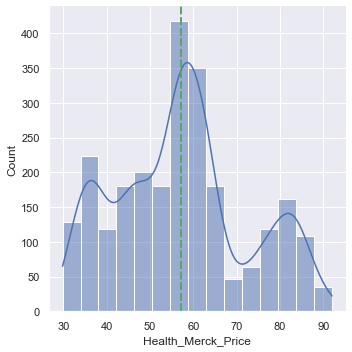

Histogram showing the spread of Health_Bausch_Price and dispersion from mean


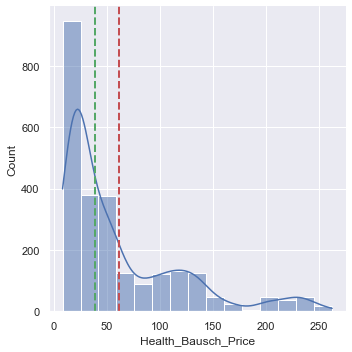

In [46]:
# Let us plot Histogram of prices of stocks from the health and pharma sector
for i in Health_Prices:
    sns.displot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Tech_Apple_Price and dispersion from mean


Histogram showing the spread of Tech_Amazon_Price and dispersion from mean


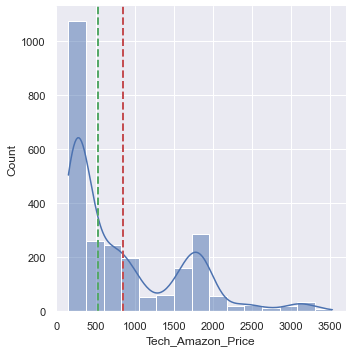

Histogram showing the spread of Tech_Google_Price and dispersion from mean


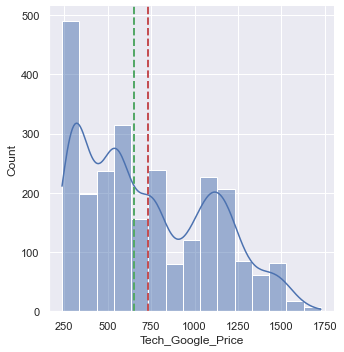

In [47]:
# Let us plot Histogram of prices of stocks from the tech sector
for i in Tech_Prices:
    sns.displot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Index_SP500_Price and dispersion from mean


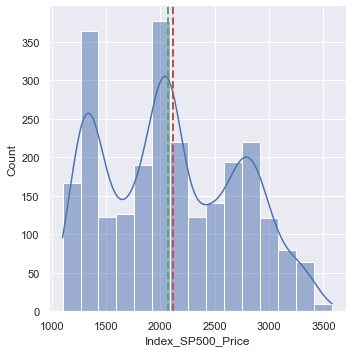

In [48]:
# Let us plot Histogram of Index price
for i in Index_Price:
    sns.displot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Aviation_American_Volume and dispersion from mean


Histogram showing the spread of Aviation_Alaska_Volume and dispersion from mean


Histogram showing the spread of Aviation_Hawaian_Volume and dispersion from mean


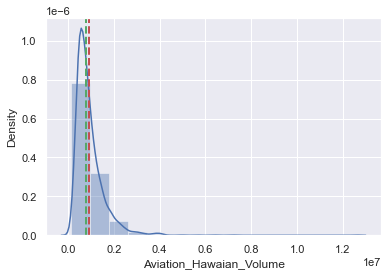

In [49]:
# Let us plot histogram of volume of stocks in aviation industry
for i in Aviation_Volume:
    sns.distplot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Fin_CreditSuisse_Volume and dispersion from mean


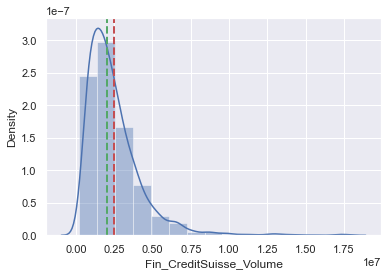

Histogram showing the spread of Fin_DeutscheBank_Volume and dispersion from mean


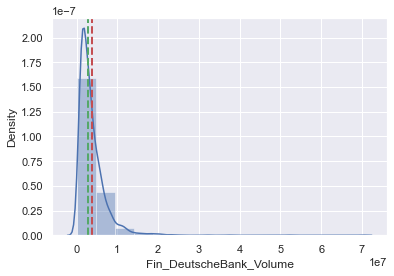

Histogram showing the spread of Fin_GoldmanSachs_Volume and dispersion from mean


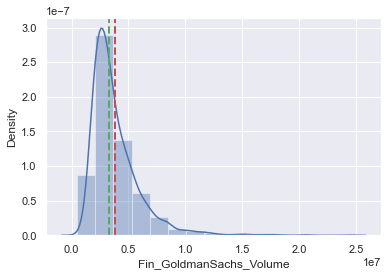

In [50]:
# Let us plot histogram of volume of stocks in finance sector

for i in Finance_Volume:
    sns.distplot(merged_df[i],bins=15,kde=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Health_J&J_Volume and dispersion from mean


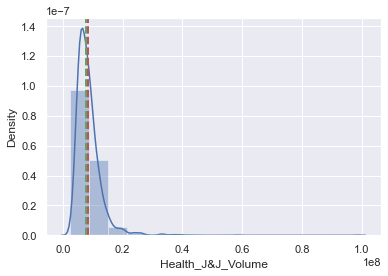

Histogram showing the spread of Health_Merck_Volume and dispersion from mean


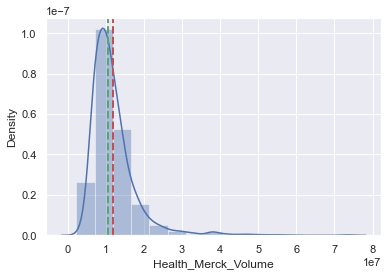

Histogram showing the spread of Health_Bausch_Volume and dispersion from mean


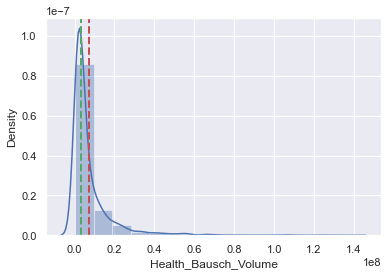

In [51]:
# Let us plot histogram of volume of stocks in Health and Pharma sector
for i in Health_Volume:
    sns.distplot(merged_df[i],bins=15,kde=True,hist=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Tech_Apple_Volume and dispersion from mean


Histogram showing the spread of Tech_Amazon_Volume and dispersion from mean


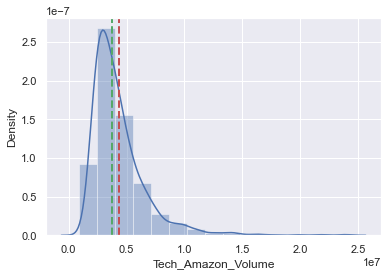

Histogram showing the spread of Tech_Google_Volume and dispersion from mean


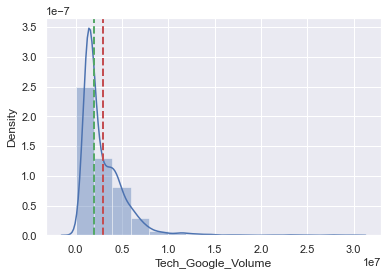

In [52]:
# Let us plot histogram of volume of stocks in Technology industry
for i in Tech_Volume:
    sns.distplot(merged_df[i],bins=15,kde=True,hist=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

In [53]:
# Let us plot histogram of volume of index
for i in Index_Volume:
    sns.distplot(merged_df[i],bins=15,kde=True,hist=True)
    plt.axvline(merged_df[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.axvline(merged_df[i].median(), color = 'g', linestyle = 'dashed', linewidth = 2)
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

Histogram showing the spread of Index_SP500_Volume and dispersion from mean


### Observation:


1.Multiple peaks in prices across stocks shows that the prices have significantly in these regions

2.Half the close prices of American Airlines, Alaskan Airlines,Deutsche Bank are more than the mean price.

3.Median of Credit Suisse,GoldmanSachs,Bausch,J&J are less than the Mean.

4.All tech stock prices have median less than the mean indicating 50% of the close prices to be less than the average

5.Mean and Median of Hawaian Airlines Price is very close.

6.Mean and Median or Merck Price co-incide.

7.Volume is right skewed indicating that bulk of the data falls to the left and there are few large values to the right.




### 3.2 Comparison of Prices across sectors and Index -As is and Normailized

In [54]:
#Let us check few records before we proceed with normalized values
merged_df.head()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2010-10-01                     9.29                12.4475   
2010-10-04                     9.12                12.1425   
2010-10-05                     9.23                12.2150   
2010-10-06                     9.23                12.1875   
2010-10-07                     9.24                11.6250   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2010-10-01                    5.96               42.226563   
2010-10-04                    5.75               41.914063   
2010-10-05                    5.85               43.154297   
2010-10-06                    5.97               43.437500   
2010-10-07                    6.15               43.671875   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2010-10-01               52.595421              147.699997         61.750000   
2010-10-04               51.755726              146.570007         61.669998   
2010-10-05               53.950382              149.570007         62.799999   
2010-10-06               54.608780              150.839996         63.209999   
2010-10-07               54.036259              151.110001         63.220001   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2010-10-01           36.599998            25.750000         10.090000   
2010-10-04           36.520000            25.870001          9.951428   
2010-10-05           37.020000            26.299999         10.319285   
2010-10-06           37.009998            26.690001         10.328215   
2010-10-07           36.709999            26.600000         10.329286   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  \
Date                                                                  
2010-10-01         153.710007         261.828613        1146.239990   
2010-10-04         155.389999         260.199707        1137.030029   
2010-10-05         160.869995         268.110046        1160.750000   
2010-10-06         155.399994         266.177307        1159.969971   
2010-10-07         156.270004         264.015411        1158.060059   

            Aviation_American_Volume  Aviation_Alaska_Volume  \
Date                                                           
2010-10-01                   3603800               1663600.0   
2010-10-04                   3856800               1512400.0   
2010-10-05                   3896600               2567200.0   
2010-10-06                   3230200               1043600.0   
2010-10-07                   3877700               7682400.0   

            Aviation_Hawaian_Volume  Fin_CreditSuisse_Volume  \
Date                                                           
2010-10-01                 645400.0                1814900.0   
2010-10-04                 618900.0                1085600.0   
2010-10-05                 534800.0                1025300.0   
2010-10-06                2563900.0                 871300.0   
2010-10-07                1115200.0                1377000.0   

            Fin_DeutscheBank_Volume  Fin_GoldmanSachs_Volume  \
Date                                                           
2010-10-01                2010600.0                7439800.0   
2010-10-04                1245600.0                5866700.0   
2010-10-05                2270900.0                8724700.0   
2010-10-06                1887400.0                6330600.0   
2010-10-07                1191000.0                4471500.0   

            Health_J&J_Volume  Health_Merck_Volume  Health_Bausch_Volume  \
Date                                                                       
2010-10-01          9773200.0           11741900.0             5778700.0

In [55]:
# As the prices of stocks vary in range, we will normalize to make it comparable.

In [56]:
# let us create variables for capturing the Normalized prices for each stock
merged_df["Aviation_American_Price_Normalized"]=merged_df["Aviation_American_Price"]/merged_df["Aviation_American_Price"][0]
merged_df["Aviation_Alaska_Price_Normalized"]=merged_df["Aviation_Alaska_Price"]/merged_df["Aviation_Alaska_Price"][0]
merged_df["Aviation_Hawaian_Price_Normalized"]=merged_df["Aviation_Hawaian_Price"]/merged_df["Aviation_Hawaian_Price"][0]
merged_df["Fin_CreditSuisse_Price_Normalized"]=merged_df["Fin_CreditSuisse_Price"]/merged_df["Fin_CreditSuisse_Price"][0]
merged_df["Fin_DeutscheBank_Price_Normalized"]=merged_df["Fin_DeutscheBank_Price"]/merged_df["Fin_DeutscheBank_Price"][0]
merged_df["Fin_GoldmanSachs_Price_Normalized"]=merged_df["Fin_GoldmanSachs_Price"]/merged_df["Fin_GoldmanSachs_Price"][0]
merged_df["Health_J&J_Price_Normalized"]=merged_df["Health_J&J_Price"]/merged_df["Health_J&J_Price"][0]
merged_df["Health_Merck_Price_Normalized"]=merged_df["Health_Merck_Price"]/merged_df["Health_Merck_Price"][0]
merged_df["Health_Bausch_Price_Normalized"]=merged_df["Health_Bausch_Price"]/merged_df["Health_Bausch_Price"][0]
merged_df["Tech_Apple_Price_Normalized"]=merged_df["Tech_Apple_Price"]/merged_df["Tech_Apple_Price"][0]
merged_df["Tech_Amazon_Price_Normalized"]=merged_df["Tech_Amazon_Price"]/merged_df["Tech_Amazon_Price"][0]
merged_df["Tech_Google_Price_Normalized"]=merged_df["Tech_Google_Price"]/merged_df["Tech_Google_Price"][0]
merged_df["Index_SP500_Price_Normalized"]=merged_df["Index_SP500_Price"]/merged_df["Index_SP500_Price"][0]


In [57]:
# Let us check the first few records. The first record on the normalised values should be 1
merged_df.head()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2010-10-01                     9.29                12.4475   
2010-10-04                     9.12                12.1425   
2010-10-05                     9.23                12.2150   
2010-10-06                     9.23                12.1875   
2010-10-07                     9.24                11.6250   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2010-10-01                    5.96               42.226563   
2010-10-04                    5.75               41.914063   
2010-10-05                    5.85               43.154297   
2010-10-06                    5.97               43.437500   
2010-10-07                    6.15               43.671875   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2010-10-01               52.595421              147.699997         61.750000   
2010-10-04               51.755726              146.570007         61.669998   
2010-10-05               53.950382              149.570007         62.799999   
2010-10-06               54.608780              150.839996         63.209999   
2010-10-07               54.036259              151.110001         63.220001   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2010-10-01           36.599998            25.750000         10.090000   
2010-10-04           36.520000            25.870001          9.951428   
2010-10-05           37.020000            26.299999         10.319285   
2010-10-06           37.009998            26.690001         10.328215   
2010-10-07           36.709999            26.600000         10.329286   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  \
Date                                                                  
2010-10-01         153.710007         261.828613        1146.239990   
2010-10-04         155.389999         260.199707        1137.030029   
2010-10-05         160.869995         268.110046        1160.750000   
2010-10-06         155.399994         266.177307        1159.969971   
2010-10-07         156.270004         264.015411        1158.060059   

            Aviation_American_Volume  Aviation_Alaska_Volume  \
Date                                                           
2010-10-01                   3603800               1663600.0   
2010-10-04                   3856800               1512400.0   
2010-10-05                   3896600               2567200.0   
2010-10-06                   3230200               1043600.0   
2010-10-07                   3877700               7682400.0   

            Aviation_Hawaian_Volume  Fin_CreditSuisse_Volume  \
Date                                                           
2010-10-01                 645400.0                1814900.0   
2010-10-04                 618900.0                1085600.0   
2010-10-05                 534800.0                1025300.0   
2010-10-06                2563900.0                 871300.0   
2010-10-07                1115200.0                1377000.0   

            Fin_DeutscheBank_Volume  Fin_GoldmanSachs_Volume  \
Date                                                           
2010-10-01                2010600.0                7439800.0   
2010-10-04                1245600.0                5866700.0   
2010-10-05                2270900.0                8724700.0   
2010-10-06                1887400.0                6330600.0   
2010-10-07                1191000.0                4471500.0   

            Health_J&J_Volume  Health_Merck_Volume  Health_Bausch_Volume  \
Date                                                                       
2010-10-01          9773200.0           11741900.0             5778700.0

In [58]:
# Let us check the last few records. this gives an idea if the prices have actually grown in the period.
merged_df.tail()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2020-09-24                    11.77              35.700001   
2020-09-25                    12.29              36.700001   
2020-09-28                    12.76              37.540001   
2020-09-29                    12.25              36.669998   
2020-09-30                    12.29              36.630001   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2020-09-24                   12.40                    9.62   
2020-09-25                   12.80                    9.48   
2020-09-28                   13.38                    9.90   
2020-09-29                   12.86                    9.83   
2020-09-30                   12.89                    9.97   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2020-09-24                    8.11              195.110001        144.669998   
2020-09-25                    8.00              194.949997        145.660004   
2020-09-28                    8.43              199.070007        147.110001   
2020-09-29                    8.27              196.789993        147.059998   
2020-09-30                    8.40              200.970001        148.880005   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2020-09-24           83.150002                15.22        108.220001   
2020-09-25           82.930000                15.30        112.279999   
2020-09-28           82.760002                15.27        114.959999   
2020-09-29           81.900002                14.88        114.089996   
2020-09-30           82.949997                15.54        115.809998   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  \
Date                                                                  
2020-09-24        3019.790039        1428.290039        3246.590088   
2020-09-25        3095.129883        1444.959961        3298.459961   
2020-09-28        3174.050049        1464.520020        3351.600098   
2020-09-29        3144.879883        1469.329956        3335.469971   
2020-09-30        3148.729980        1469.599976        3363.000000   

            Aviation_American_Volume  Aviation_Alaska_Volume  \
Date                                                           
2020-09-24                  49163200               3326000.0   
2020-09-25                  43764000               1767600.0   
2020-09-28                  63558200               2922800.0   
2020-09-29                  46994300               1743500.0   
2020-09-30                  65055100               1921600.0   

            Aviation_Hawaian_Volume  Fin_CreditSuisse_Volume  \
Date                                                           
2020-09-24                 879700.0                2347300.0   
2020-09-25                 923400.0                2241100.0   
2020-09-28                1076800.0                2165500.0   
2020-09-29                 953100.0                1767800.0   
2020-09-30                 916700.0                2495600.0   

            Fin_DeutscheBank_Volume  Fin_GoldmanSachs_Volume  \
Date                                                           
2020-09-24                3842200.0                5114600.0   
2020-09-25                5570900.0                3106000.0   
2020-09-28                4359600.0                3280100.0   
2020-09-29                4034000.0                2400000.0   
2020-09-30                4516300.0                3073900.0   

            Health_J&J_Volume  Health_Merck_Volume  Health_Bausch_Volume  \
Date                                                                       
2020-09-24          5614800.0            7485000.0             5019400.0

In [59]:
# CreditSuisse, Deutsche Bank and BoschHealth have the last record less than 1 indicating that the prices at the end of the period is less than the start.

In [60]:
# Let us create industry wise variable for normalized prices
Aviation_Prices_Normalized=["Aviation_American_Price_Normalized","Aviation_Alaska_Price_Normalized",
                            "Aviation_Hawaian_Price_Normalized"]
Fin_Prices_Normalized=["Fin_CreditSuisse_Price_Normalized","Fin_DeutscheBank_Price_Normalized",
                       "Fin_GoldmanSachs_Price_Normalized"]
Health_Prices_Normalized=["Health_J&J_Price_Normalized","Health_Merck_Price_Normalized",
                          "Health_Bausch_Price_Normalized"]
Tech_Prices_Normalized=["Tech_Apple_Price_Normalized","Tech_Amazon_Price_Normalized","Tech_Google_Price_Normalized"]
Index_Price_Normalized=["Index_SP500_Price_Normalized"]

In [61]:
# Let us plot the chart with prices in the aviation sector and normalized prices in the sector vis-a-vis the index
plt.figure(figsize=(20,12))
merged_df[Aviation_Prices].plot()
plt.title("Price Trend in Aviation Sector")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Plot with normalized prices
plt.figure(figsize=(20,12))
merged_df[Aviation_Prices_Normalized+Index_Price_Normalized].plot()
plt.ylabel("Normalized Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.title("Normalized Price Trend in Aviation Sector")
plt.tight_layout()
plt.show()


<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

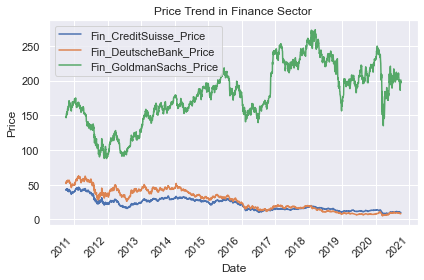

<Figure size 1440x864 with 0 Axes>

In [62]:
# Let us plot the chart with prices in the Finance sector and normalized prices in the sector vis-a-vis the index
plt.figure(figsize=(20,12))
merged_df[Finance_Prices].plot()
plt.title("Price Trend in Finance Sector")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Plot with normalized prices
plt.figure(figsize=(20,12))
merged_df[Fin_Prices_Normalized+Index_Price_Normalized].plot()
plt.ylabel("Normalized Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.title("Normalized Price Trend in Finance Sector")
plt.tight_layout()
plt.show()


In [63]:
# Let us plot the chart with prices in the Health and Pharma sector and normalized prices in the sector vis-a-vis the index
plt.figure(figsize=(20,12))
merged_df[Health_Prices].plot()
plt.title("Price Trend in Health_Pharma Sector")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Plot with normalized prices
plt.figure(figsize=(20,12))
merged_df[Health_Prices_Normalized+Index_Price_Normalized].plot()
plt.ylabel("Normalized Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.title("Normalized Price Trend in Health_Pharma Sector")
plt.tight_layout()
plt.show()

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [64]:
# Let us plot the chart with prices in the Technology sector and normalized prices in the sector vis-a-vis the index
plt.figure(figsize=(20,12))
merged_df[Tech_Prices].plot()
plt.title("Price Trend in Technology Sector")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Plot with normalized prices
plt.figure(figsize=(20,12))
merged_df[Tech_Prices_Normalized+Index_Price_Normalized].plot()
plt.ylabel("Normalized Price")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.title("Normalized Price Trend in Technology Sector")
plt.tight_layout()
plt.show()

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [65]:
# Let us plot a chart showing the prices of the index S&P500
plt.figure(figsize=(12,6))
merged_df["Index_SP500_Price"].plot()
plt.ylabel("Price")
plt.title("Price Trend in S&P500 Market Index ")
plt.xticks(rotation=90)
plt.show()


# Plot with normalized prices
plt.figure(figsize=(12,6))
merged_df["Index_SP500_Price_Normalized"].plot()
plt.ylabel("Normalized Price")
plt.xticks(rotation=90)
plt.title("Normalized Price Trend in S&P500 Market Index ")
plt.show()

### Observation:

1.If we see the normalized market index price, it has grown almost three times in the period under analysis.

2.**Aviation** 

    i.Alaskan Airlines prices have dropped since 2018.
    
    ii.Normalized Price as of end Sep 2020 is almost same as the market index.
    
    iii.Both Amercian and Hawaian Airlines have grown at a rate less than a market.
    
3.**Finance**

    i.CreditSuisse and DeutscheBank have a Normalized price of less than 1 which means the prices have not increased compared to the base price
    
    ii.The price growth in GoldmanSachs is less than the market
    
4.**Health and Pharma**

    i.Bausch Price in 2021 is less than the price in 2010.
    
    ii.Market Index is performing better than Merck and J&J.

5.**Technology**

    i.All technology stocks are outperforming the market index

### 3.3 Volume Trend Analysis

<Figure size 1440x864 with 0 Axes>

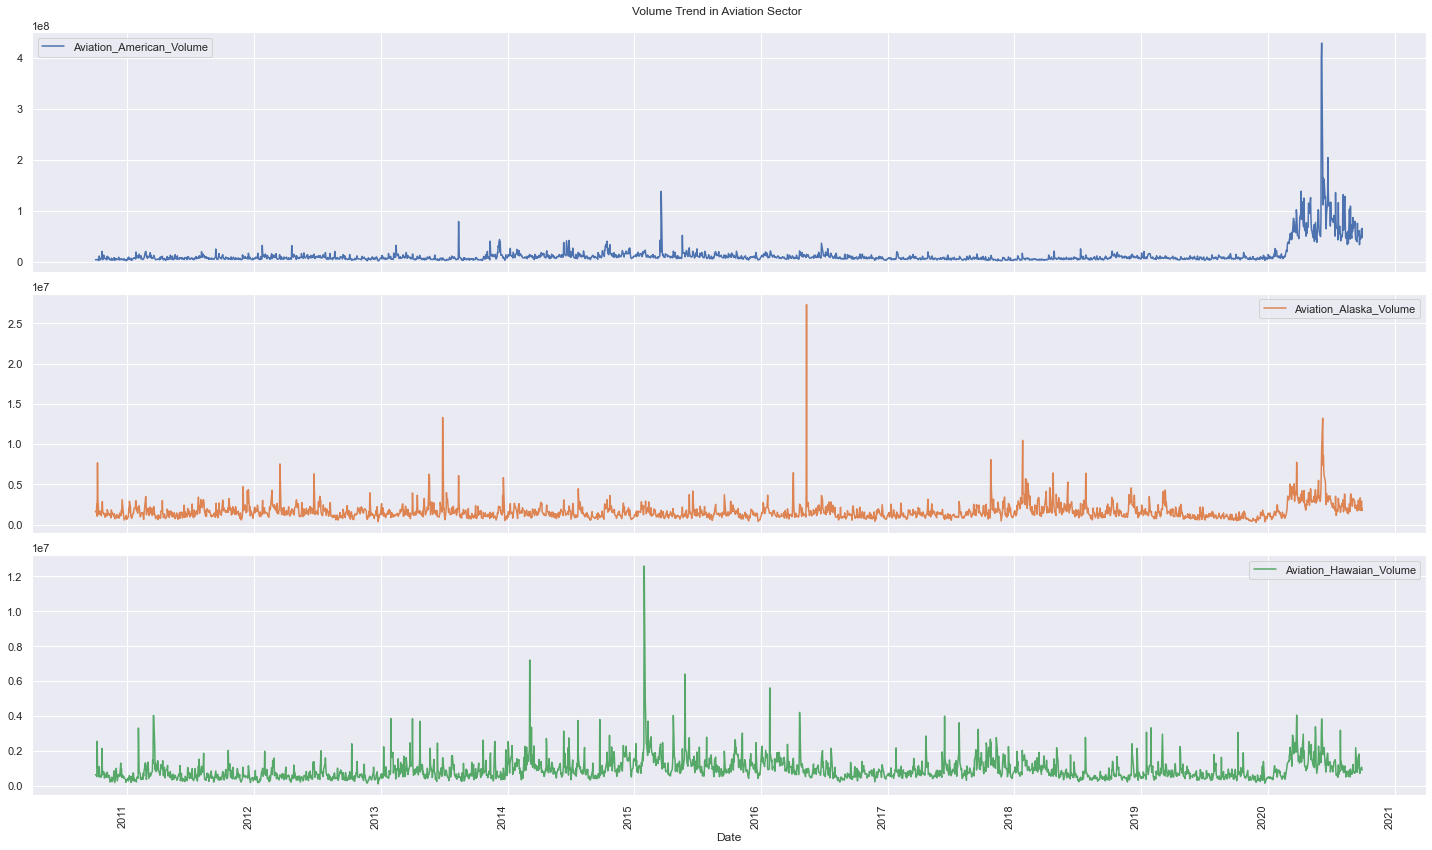

In [66]:
# Let us check the volume trend in aviation sector
plt.figure(figsize=(20,12))
merged_df[Aviation_Volume].plot(kind="line",subplots=True,layout=(3,1),figsize=(20,12))
plt.xticks(rotation=90)
plt.suptitle("Volume Trend in Aviation Sector",)
plt.tight_layout()
plt.show()

<Figure size 1440x864 with 0 Axes>

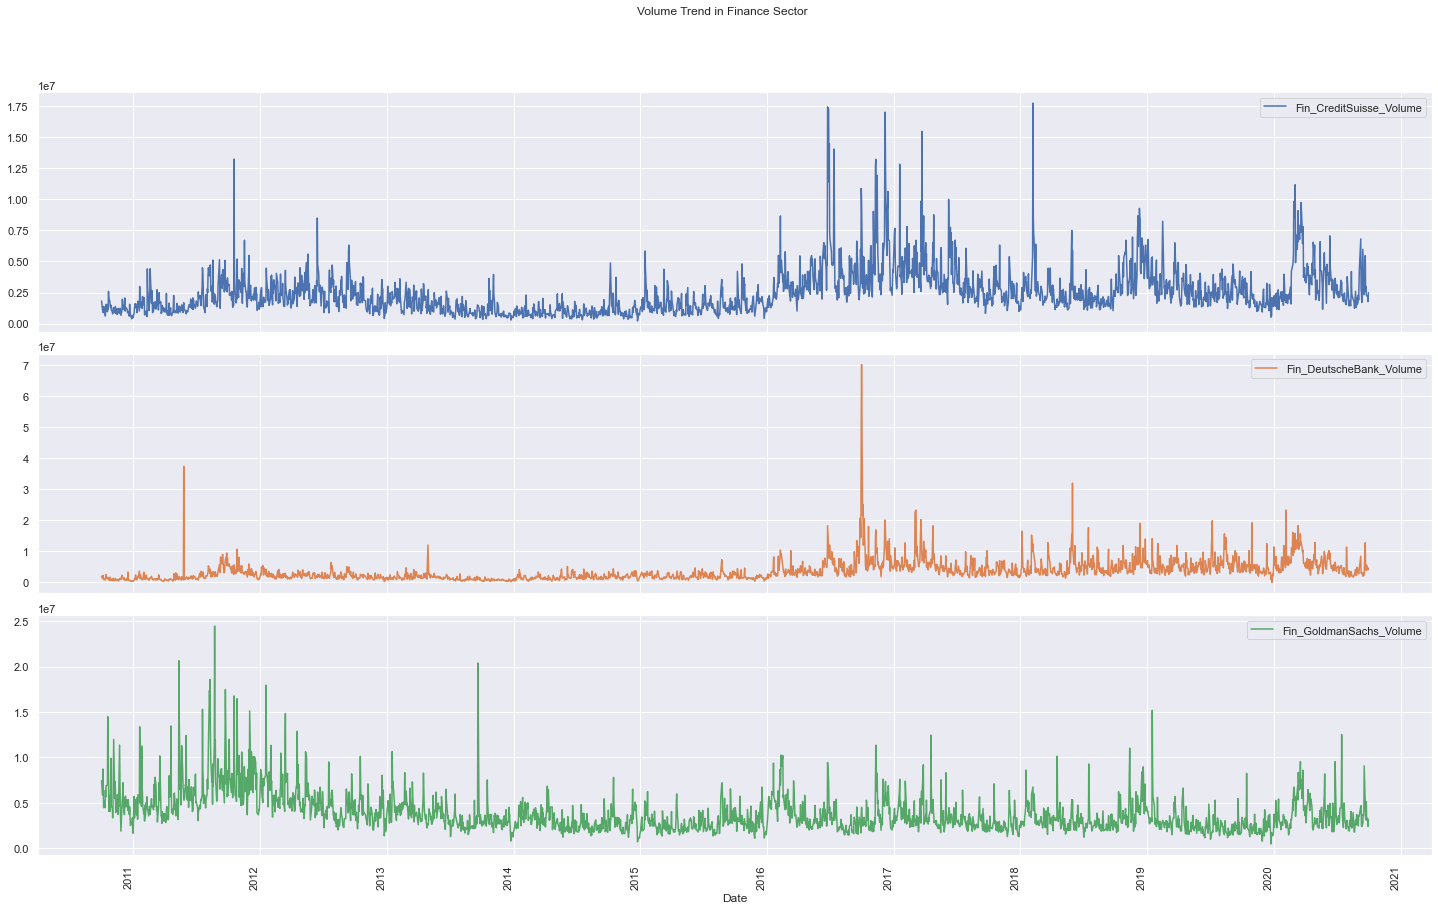

In [67]:
# Let us check the volume trend in Finance sector
plt.figure(figsize=(20,12))
merged_df[Finance_Volume].plot(kind="line",subplots=True,layout=(3,1),figsize=(20,12))
plt.suptitle("Volume Trend in Finance Sector",y=1.05)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [68]:
# Let us check the volume trend in Health and Pharma sector
plt.figure(figsize=(20,12))
merged_df[Health_Volume].plot(kind="line",subplots=True,layout=(3,1),figsize=(20,12))
plt.suptitle("Volume Trend in Health Sector",y=1.05)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x864 with 0 Axes>

In [69]:
# Let us check the volume trend in Technology sector
plt.figure(figsize=(20,12))
merged_df[Tech_Volume].plot(kind="line",subplots=True,layout=(3,1),figsize=(20,12))
plt.suptitle("Volume Trend in Technology Sector",y=1.05)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x864 with 0 Axes>

### Observation

1.Volume of all stocks in Aviation sector have increased in 2020

2.Amazon Volume has been fluctuating , volume traded in Apple and Google are stable.

3.Volume of Bausch has dropped significantly compared from 2018.



### 3.4 Correlation Analysis

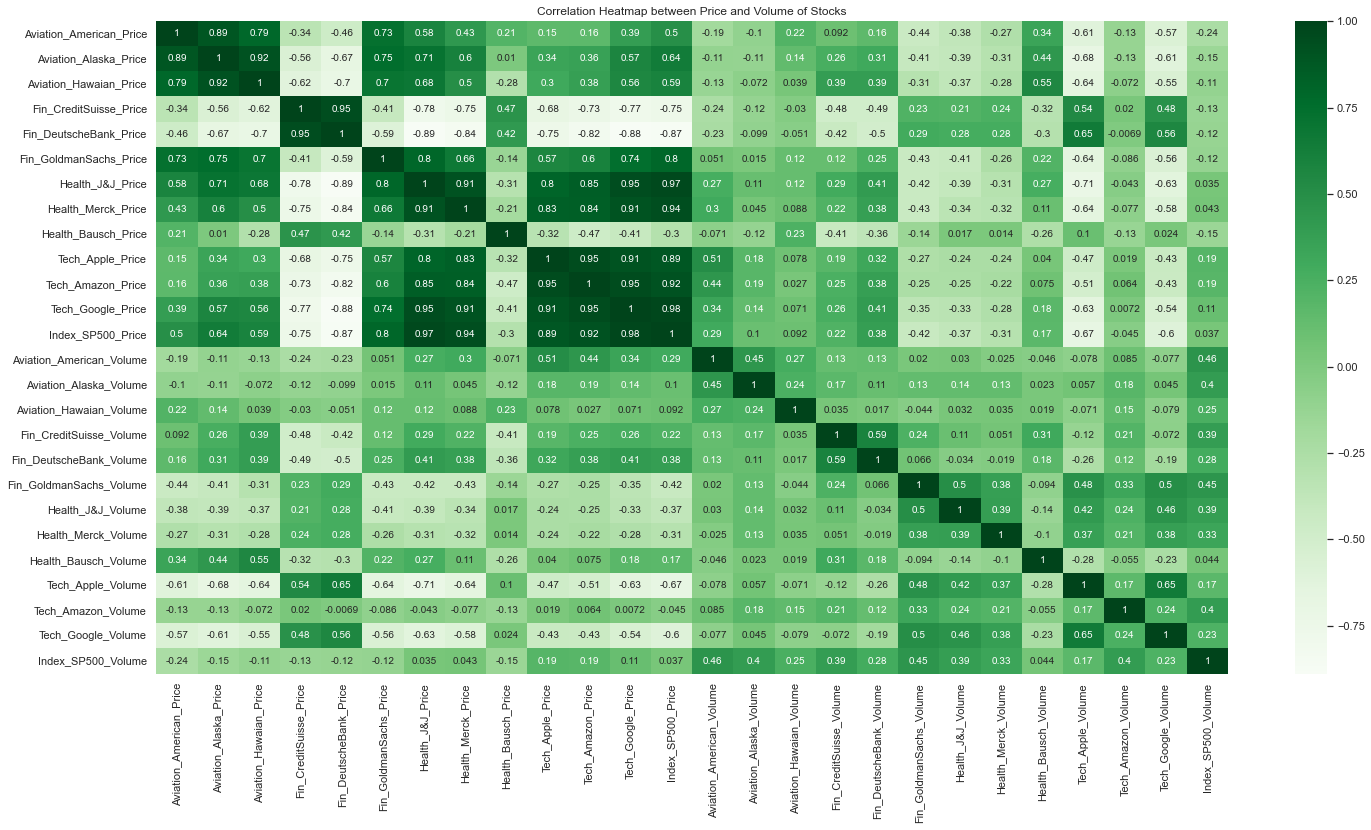

In [70]:
# Let us plot a correlation heatmap of the price and volume variables
plt.figure(figsize=(24, 12))
plt.title("Correlation Heatmap between Price and Volume of Stocks")
sns.heatmap(data=merged_df[(Aviation_Prices+Finance_Prices+Health_Prices
                        +Tech_Prices+Index_Price+Aviation_Volume+Finance_Volume
                        +Health_Volume+Tech_Volume+Index_Volume)].corr(), annot=True, cmap="Greens")
plt.show()

### Observation

1.Prices of Technology Stocks,J&J, Merck and GoldmanSachs have a strong positive correlation with the Index Price

2.All Aviation Stock Prices except Alaska have weak correlation with the Index Price.

3.Credit Suisse,Deutsche Bank have negative correlation with the Index Price and GoldmanSachs Price.

4.BauschHealth has a negative correlation with other Health and Pharma Stocks and the Index

4.There is a positive correlation between Deutsche Bank Price and Apple Volume and Apple Volume and Google Volume.

### 3.5 Relative Strength Index

In [71]:
# Let us create a Dataframe with prices of all stocks and index
Prices=merged_df[Aviation_Prices+Finance_Prices+Health_Prices+Tech_Prices+Index_Price]

In [72]:
# Let us create a Dataframe with Relative Strength of stock prices wrt Index
Relative_Strength=pd.DataFrame()

for i in Prices.columns:
    Relative_Strength[i+"_RS"]=Prices[i]/Prices["Index_SP500_Price"]

Relative_Strength.head()
    

Aviation_American_Price_RS  Aviation_Alaska_Price_RS  \
Date                                                               
2010-10-01                    0.008105                  0.010859   
2010-10-04                    0.008021                  0.010679   
2010-10-05                    0.007952                  0.010523   
2010-10-06                    0.007957                  0.010507   
2010-10-07                    0.007979                  0.010038   

            Aviation_Hawaian_Price_RS  Fin_CreditSuisse_Price_RS  \
Date                                                               
2010-10-01                   0.005200                   0.036839   
2010-10-04                   0.005057                   0.036863   
2010-10-05                   0.005040                   0.037178   
2010-10-06                   0.005147                   0.037447   
2010-10-07                   0.005311                   0.037711   

            Fin_DeutscheBank_Price_RS  Fin_GoldmanSachs_Price_RS  \
Date                                                               
2010-10-01                   0.045885                   0.128856   
2010-10-04                   0.045518                   0.128906   
2010-10-05                   0.046479                   0.128856   
2010-10-06                   0.047078                   0.130038   
2010-10-07                   0.046661                   0.130485   

            Health_J&J_Price_RS  Health_Merck_Price_RS  \
Date                                                     
2010-10-01             0.053872               0.031930   
2010-10-04             0.054238               0.032119   
2010-10-05             0.054103               0.031893   
2010-10-06             0.054493               0.031906   
2010-10-07             0.054591               0.031700   

            Health_Bausch_Price_RS  Tech_Apple_Price_RS  Tech_Amazon_Price_RS  \
Date                                                                            
2010-10-01                0.022465             0.008803              0.134099   
2010-10-04                0.022752             0.008752              0.136663   
2010-10-05                0.022658             0.008890              0.138591   
2010-10-06                0.023009             0.008904              0.133969   
2010-10-07                0.022969             0.008919              0.134941   

            Tech_Google_Price_RS  Index_SP500_Price_RS  
Date                                                    
2010-10-01              0.228424                   1.0  
2010-10-04              0.228842                   1.0  
2010-10-05              0.230980                   1.0  
2010-10-06              0.229469                   1.0  
2010-10-07              0.227981                   1.0

In [73]:
# Plotting the chart to see the Relative Strength of stocks in Aviation Sector
plt.figure(figsize=(15,10))
Relative_Strength[["Aviation_American_Price_RS","Aviation_Alaska_Price_RS","Aviation_Hawaian_Price_RS"]].plot()
plt.ylabel("Relative Strength")
plt.title("Chart showing Relative Strength of Stocks in Aviation Sector")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

In [74]:
# Plotting the chart to see the Relative Strength of stocks in Finance Sector
plt.figure(figsize=(15,10))
Relative_Strength[["Fin_CreditSuisse_Price_RS","Fin_DeutscheBank_Price_RS","Fin_GoldmanSachs_Price_RS"]].plot()
plt.title("Chart showing Relative Strength of Stocks in Finance Sector")
plt.ylabel("Relative Strength")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

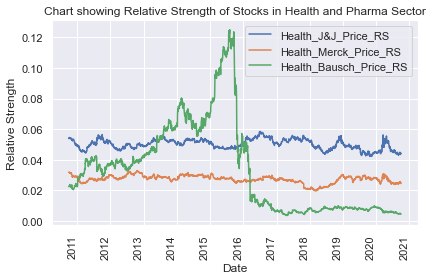

In [75]:
# Plotting the chart to see the Relative Strength of stocks in Health and Pharma Sector
plt.figure(figsize=(15,10))
Relative_Strength[["Health_J&J_Price_RS","Health_Merck_Price_RS","Health_Bausch_Price_RS"]].plot()
plt.ylabel("Relative Strength")
plt.title("Chart showing Relative Strength of Stocks in Health and Pharma Sector")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

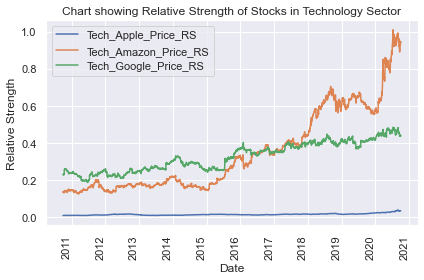

In [76]:
# Plotting the chart to see the Relative Strength of stocks in Technology Sector
plt.figure(figsize=(15,10))
Relative_Strength[["Tech_Apple_Price_RS","Tech_Amazon_Price_RS","Tech_Google_Price_RS"]].plot()
plt.ylabel("Relative Strength")
plt.title("Chart showing Relative Strength of Stocks in Technology Sector")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


### Observation

1.Aviation Sector has wide flucuations compared to the index.

2.Bausch Stock varies widely compared to the index in earlier years, less flucuations from 2017.

3.Technology Stock of Amazon outperfoms the index.


### 4.Stock Analysis and Portfolio Management - CAPM

### 4.1 Daily Return

In [77]:
# Let us check few records from the Dataframe Prices
Prices.head()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2010-10-01                     9.29                12.4475   
2010-10-04                     9.12                12.1425   
2010-10-05                     9.23                12.2150   
2010-10-06                     9.23                12.1875   
2010-10-07                     9.24                11.6250   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2010-10-01                    5.96               42.226563   
2010-10-04                    5.75               41.914063   
2010-10-05                    5.85               43.154297   
2010-10-06                    5.97               43.437500   
2010-10-07                    6.15               43.671875   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2010-10-01               52.595421              147.699997         61.750000   
2010-10-04               51.755726              146.570007         61.669998   
2010-10-05               53.950382              149.570007         62.799999   
2010-10-06               54.608780              150.839996         63.209999   
2010-10-07               54.036259              151.110001         63.220001   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2010-10-01           36.599998            25.750000         10.090000   
2010-10-04           36.520000            25.870001          9.951428   
2010-10-05           37.020000            26.299999         10.319285   
2010-10-06           37.009998            26.690001         10.328215   
2010-10-07           36.709999            26.600000         10.329286   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  
Date                                                                 
2010-10-01         153.710007         261.828613        1146.239990  
2010-10-04         155.389999         260.199707        1137.030029  
2010-10-05         160.869995         268.110046        1160.750000  
2010-10-06         155.399994         266.177307        1159.969971  
2010-10-07         156.270004         264.015411        1158.060059

In [78]:
# Calculating the daily returns and storing the same in a Dataframe
Returns=Prices.pct_change()
Returns.head()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2010-10-01                      NaN                    NaN   
2010-10-04                -0.018299              -0.024503   
2010-10-05                 0.012061               0.005971   
2010-10-06                 0.000000              -0.002251   
2010-10-07                 0.001083              -0.046154   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2010-10-01                     NaN                     NaN   
2010-10-04               -0.035235               -0.007401   
2010-10-05                0.017391                0.029590   
2010-10-06                0.020513                0.006563   
2010-10-07                0.030151                0.005396   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2010-10-01                     NaN                     NaN               NaN   
2010-10-04               -0.015965               -0.007651         -0.001296   
2010-10-05                0.042404                0.020468          0.018323   
2010-10-06                0.012204                0.008491          0.006529   
2010-10-07               -0.010484                0.001790          0.000158   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2010-10-01                 NaN                  NaN               NaN   
2010-10-04           -0.002186             0.004660         -0.013734   
2010-10-05            0.013691             0.016621          0.036965   
2010-10-06           -0.000270             0.014829          0.000865   
2010-10-07           -0.008106            -0.003372          0.000104   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  
Date                                                                 
2010-10-01                NaN                NaN                NaN  
2010-10-04           0.010930          -0.006221          -0.008035  
2010-10-05           0.035266           0.030401           0.020861  
2010-10-06          -0.034003          -0.007209          -0.000672  
2010-10-07           0.005599          -0.008122          -0.001647

In [79]:
# Let us check the column names
Returns.columns

Index(['Aviation_American_Price', 'Aviation_Alaska_Price',
       'Aviation_Hawaian_Price', 'Fin_CreditSuisse_Price',
       'Fin_DeutscheBank_Price', 'Fin_GoldmanSachs_Price', 'Health_J&J_Price',
       'Health_Merck_Price', 'Health_Bausch_Price', 'Tech_Apple_Price',
       'Tech_Amazon_Price', 'Tech_Google_Price', 'Index_SP500_Price'],
      dtype='object')

In [80]:
# Let us rename the columns in Returns Dataframe for ease of understanding
Returns.rename(columns={'Aviation_American_Price':'Aviation_American_Return', 
                        'Aviation_Alaska_Price':'Aviation_Alaska_Return',
                        'Aviation_Hawaian_Price':'Aviation_Hawaian_Return', 
                        'Fin_CreditSuisse_Price':'Fin_CreditSuisse_Return',
                        'Fin_DeutscheBank_Price':'Fin_DeutscheBank_Return',
                        'Fin_GoldmanSachs_Price':'Fin_GoldmanSachs_Return', 'Health_J&J_Price':'Health_J&J_Return',
                        'Health_Merck_Price':'Health_Merck_Return','Health_Bausch_Price':'Health_Bausch_Return', 
                        'Tech_Apple_Price':'Tech_Apple_Return','Tech_Amazon_Price':'Tech_Amazon_Return', 
                        'Tech_Google_Price':'Tech_Google_Return','Index_SP500_Price':'Index_SP500_Return'},
               inplace=True)

In [81]:
# let us check the summary statistics of the Returns
Returns.describe()

Aviation_American_Return  Aviation_Alaska_Return  \
count               2516.000000             2516.000000   
mean                   0.000637                0.000709   
std                    0.032726                0.023562   
min                   -0.252246               -0.232385   
25%                   -0.014116               -0.010126   
50%                    0.000216                0.000788   
75%                    0.015593                0.011655   
max                    0.410970                0.203079   

       Aviation_Hawaian_Return  Fin_CreditSuisse_Return  \
count              2516.000000              2516.000000   
mean                  0.000765                -0.000325   
std                   0.030147                 0.022206   
min                  -0.269722                -0.182598   
25%                  -0.013826                -0.010897   
50%                   0.000451                 0.000000   
75%                   0.015317                 0.010796   
max                   0.245837                 0.163447   

       Fin_DeutscheBank_Return  Fin_GoldmanSachs_Return  Health_J&J_Return  \
count              2516.000000              2516.000000        2516.000000   
mean                 -0.000381                 0.000291           0.000409   
std                   0.026374                 0.018331           0.010847   
min                  -0.174888                -0.127053          -0.100379   
25%                  -0.013920                -0.008367          -0.004283   
50%                  -0.000495                 0.000490           0.000299   
75%                   0.013712                 0.009413           0.005656   
max                   0.179506                 0.175803           0.079977   

       Health_Merck_Return  Health_Bausch_Return  Tech_Apple_Return  \
count          2516.000000           2516.000000        2516.000000   
mean              0.000410              0.000464           0.001128   
std               0.013049              0.035700           0.017719   
min              -0.088990             -0.514629          -0.128647   
25%              -0.006119             -0.013011          -0.006971   
50%               0.000283              0.000431           0.000891   
75%               0.007303              0.014973           0.010209   
max               0.104080              0.337444           0.119808   

       Tech_Amazon_Return  Tech_Google_Return  Index_SP500_Return  
count         2516.000000         2516.000000         2516.000000  
mean             0.001398            0.000818            0.000488  
std              0.019889            0.016288            0.010934  
min             -0.126568           -0.111008           -0.119841  
25%             -0.008133           -0.006431           -0.003308  
50%              0.001107            0.000659            0.000653  
75%              0.011457            0.008646            0.005229  
max              0.157457            0.160524            0.093828

#### Dispersion of Returns from Mean

Histogram showing the spread of Aviation_American_Return and dispersion from mean


Histogram showing the spread of Aviation_Alaska_Return and dispersion from mean


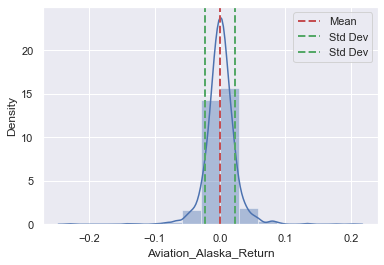

Histogram showing the spread of Aviation_Hawaian_Return and dispersion from mean


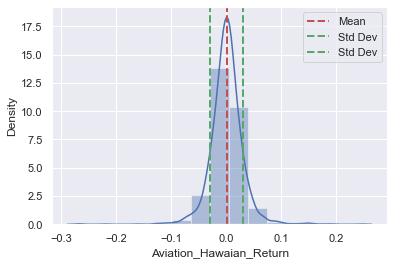

Histogram showing the spread of Fin_CreditSuisse_Return and dispersion from mean


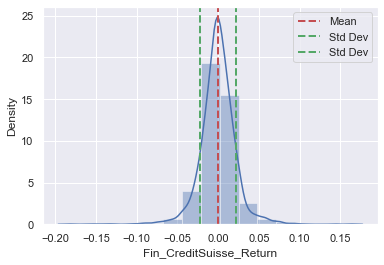

Histogram showing the spread of Fin_DeutscheBank_Return and dispersion from mean


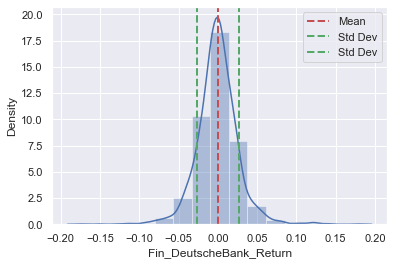

Histogram showing the spread of Fin_GoldmanSachs_Return and dispersion from mean


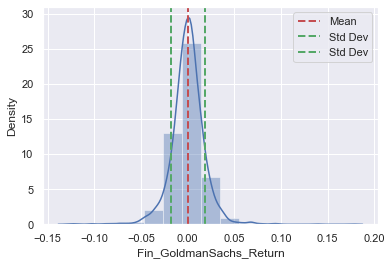

Histogram showing the spread of Health_J&J_Return and dispersion from mean


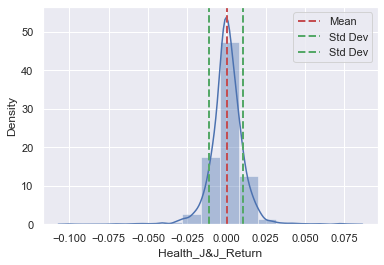

Histogram showing the spread of Health_Merck_Return and dispersion from mean


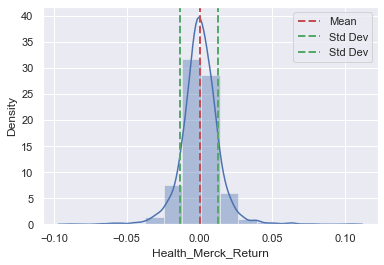

Histogram showing the spread of Health_Bausch_Return and dispersion from mean


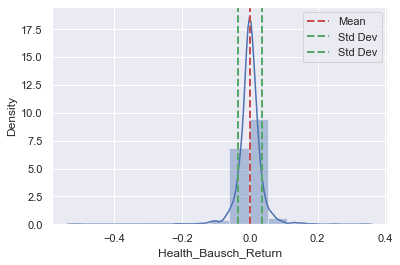

Histogram showing the spread of Tech_Apple_Return and dispersion from mean


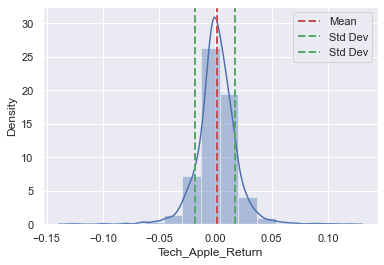

Histogram showing the spread of Tech_Amazon_Return and dispersion from mean


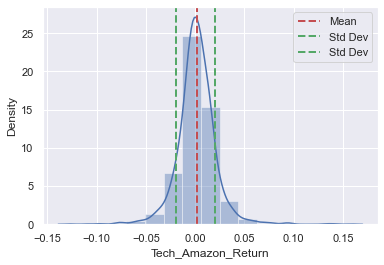

Histogram showing the spread of Tech_Google_Return and dispersion from mean


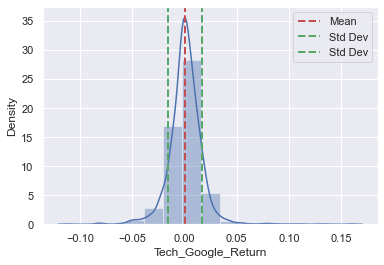

Histogram showing the spread of Index_SP500_Return and dispersion from mean


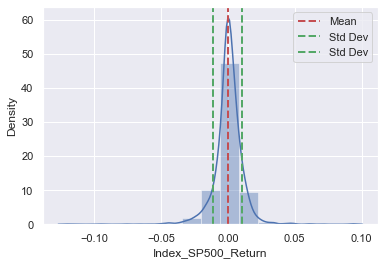

In [82]:
# Let us look at the distribution of returns and see its dispersion from mean
for i in Returns:
    sns.distplot(Returns[i],bins=15)
    plt.axvline(Returns[i].mean(), color = 'r', linestyle = 'dashed', linewidth = 2,label="Mean")
    plt.axvline(Returns[i].std(), color = 'g', linestyle = 'dashed', linewidth = 2,label="Std Dev")
    plt.axvline((-Returns[i].std()), color = 'g', linestyle = 'dashed', linewidth = 2,label="Std Dev")
    plt.legend()
    print("Histogram showing the spread of",i ,"and dispersion from mean")
    plt.xlabel(i)
    plt.show()

### Observation

**Aviation - Dispersion from mean is more in American Airlines and Hawaian Airlines compared to Alaska.**

**Finance - Goldman Sachs has the least dispersion from Mean.**

**Health and Pharma - Bausch has high dispersion from Mean.**

**Technology - All tech stocks have moderate dispersion from mean,this is slightly more than the Market Index.**


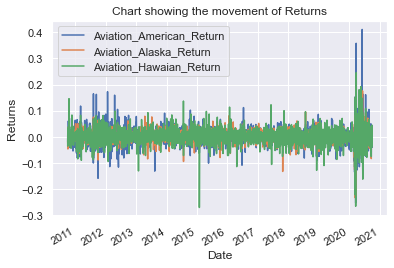

In [83]:
# Let us plot the returns from the Aviation Sector
Returns[['Aviation_American_Return', 'Aviation_Alaska_Return',
       'Aviation_Hawaian_Return']].plot()
plt.title("Chart showing the movement of Returns")
plt.ylabel("Returns")
plt.show()

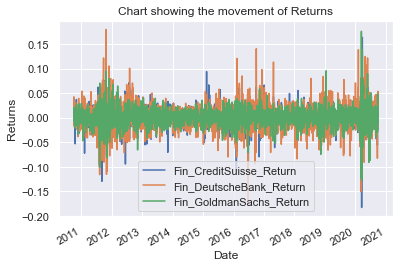

In [84]:
# Let us plot the returns from the Finance Sector
Returns[['Fin_CreditSuisse_Return',
       'Fin_DeutscheBank_Return', 'Fin_GoldmanSachs_Return']].plot()
plt.title("Chart showing the movement of Returns")
plt.ylabel("Returns")
plt.show()

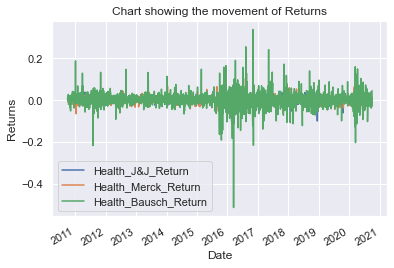

In [85]:
# Let us plot the returns from Health and Pharna Sector
Returns[['Health_J&J_Return', 'Health_Merck_Return', 'Health_Bausch_Return']].plot()
plt.title("Chart showing the movement of Returns")
plt.ylabel("Returns")
plt.show()

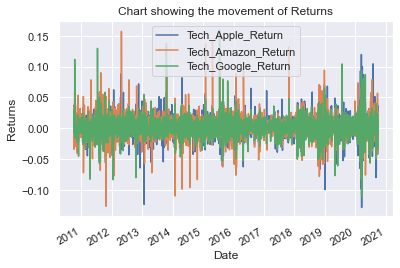

In [86]:
# Let us plot the returns from Tech Sector
Returns[['Tech_Apple_Return', 'Tech_Amazon_Return', 'Tech_Google_Return']].plot()
plt.title("Chart showing the movement of Returns")
plt.ylabel("Returns")
plt.show()

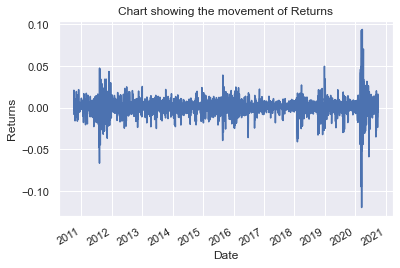

In [87]:
# Let us plot the returns from Index S&P500
Returns["Index_SP500_Return"].plot()
plt.title("Chart showing the movement of Returns")
plt.ylabel("Returns")
plt.show()

1.Huge variation in returns of Aviation Sector and market Index in 2020

2.Maximum drop in Bausch Return seen in 2016 in Bosch (more than -0.4)

3.Fluctuations are also more in Finance Sector in late 2011 and early 2020.

#### Scatter Plot - Returns from individual stocks and Market Index

Scatter Plot showing the Index Return vs  Aviation_American_Return


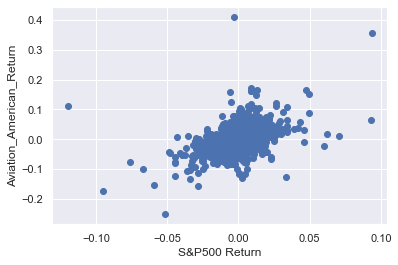

Scatter Plot showing the Index Return vs  Aviation_Alaska_Return


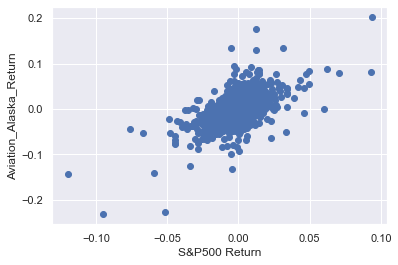

Scatter Plot showing the Index Return vs  Aviation_Hawaian_Return


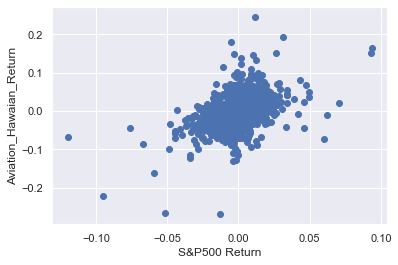

Scatter Plot showing the Index Return vs  Fin_CreditSuisse_Return


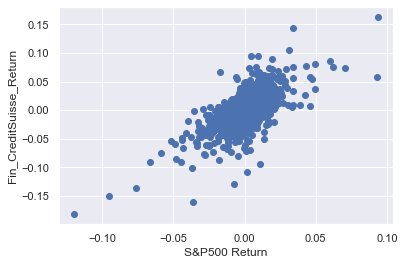

Scatter Plot showing the Index Return vs  Fin_DeutscheBank_Return


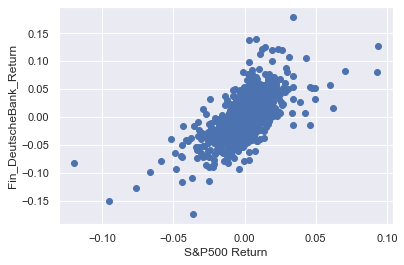

Scatter Plot showing the Index Return vs  Fin_GoldmanSachs_Return


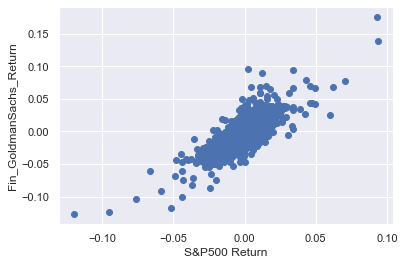

Scatter Plot showing the Index Return vs  Health_J&J_Return


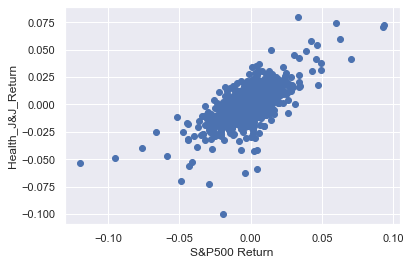

Scatter Plot showing the Index Return vs  Health_Merck_Return


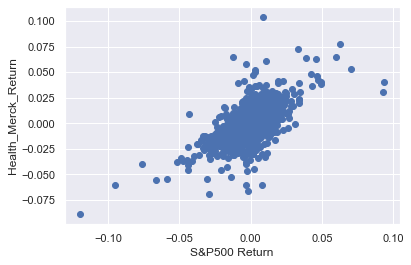

Scatter Plot showing the Index Return vs  Health_Bausch_Return


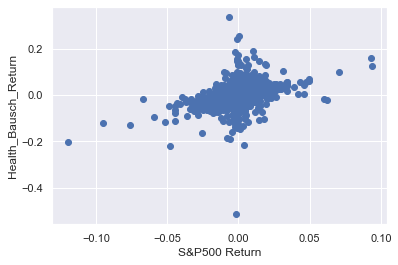

Scatter Plot showing the Index Return vs  Tech_Apple_Return


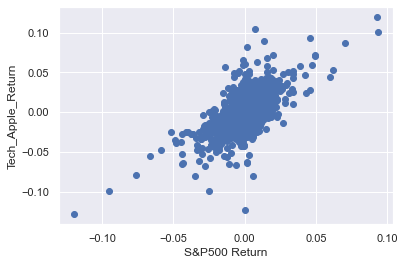

Scatter Plot showing the Index Return vs  Tech_Amazon_Return


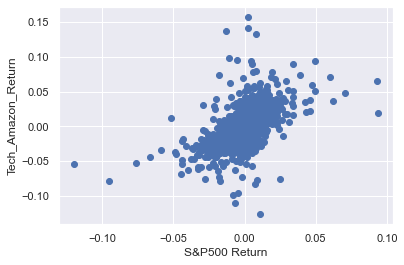

Scatter Plot showing the Index Return vs  Tech_Google_Return


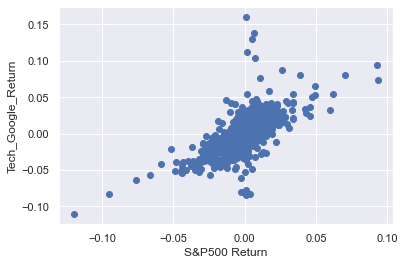

Scatter Plot showing the Index Return vs  Index_SP500_Return


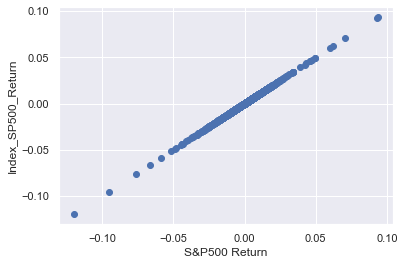

In [88]:
# Plotting scatter plot
for i in Returns.columns:
    plt.scatter(x="Index_SP500_Return",y=i,data=Returns)
    print("Scatter Plot showing the Index Return vs ",i)
    plt.xlabel("S&P500 Return")
    plt.ylabel(i)
    plt.show()

#### Correlation Heatmap of Returns

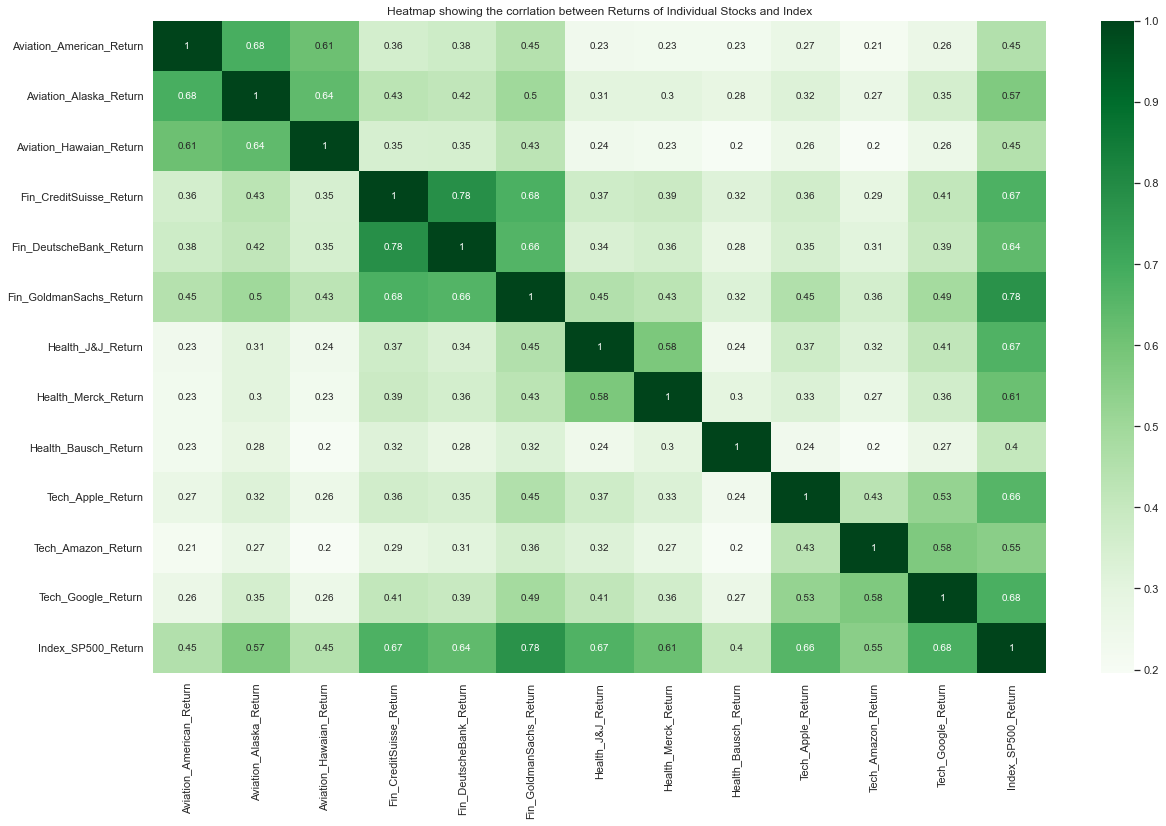

In [89]:
# Let us also plot a correlation heatmap to see the correlation between individual stock returns
plt.figure(figsize=(20,12))
sns.heatmap(Returns.corr(),annot=True,cmap="Greens")
plt.title("Heatmap showing the corrlation between Returns of Individual Stocks and Index")
plt.show()

### Observation

The line chart, scatter plot correlation heatmap of the Returns show that

**Aviation**
1.Aviation Stock Returns have weak correlation with Market Returns.

2.American Airlines has given maximum daily return of 0.41 in 2020.

**Finance**

CreditSuisse and Deutsche Bank have a positive correlation with Market Return.

**Health and Pharma**

BauschHealth has a weak correlation with Market Index Return
Returns from Health and Pharma have a weak correlation amongst them.

**Technology**

Apple and Google Returns have a strong positive correlation with Index Return.
Returns of technology stocks are weakly correlated amongst each other. 


# 4.2 Annualized Return

In [90]:
# Let us calculate the Annualized Daily Return by taking 252 as the trading days
Annualized_Returns=[]
col=[]

for i in Returns.columns:
    col.append(i.replace("_Return",""))
    
for i in Returns.columns:
    Annualized_Returns.append(round(Returns[i].mean()*252*100,2))


In [91]:
# Let us create a dataframe to map all the performance metrics
CAPM_df=pd.DataFrame(list(zip(col,Annualized_Returns)),columns=["Stock","Annualized_Return"])
CAPM_df

Stock  Annualized_Return
0   Aviation_American              16.05
1     Aviation_Alaska              17.88
2    Aviation_Hawaian              19.28
3    Fin_CreditSuisse              -8.19
4    Fin_DeutscheBank              -9.61
5    Fin_GoldmanSachs               7.32
6          Health_J&J              10.30
7        Health_Merck              10.34
8       Health_Bausch              11.70
9          Tech_Apple              28.42
10        Tech_Amazon              35.22
11        Tech_Google              20.60
12        Index_SP500              12.30

### Observation

1.Finance Sector Stocks and Health and Pharma Sector Stocks have Annualized Return less than the Index

2.Technology and Aviation Stocks are giving Annualized Returns more than Market Index.

### 4.3 Cumulative Return

In [92]:
# Let us now calculate the Cumulative Returns in individual stocks from 2010
Cum_Return =[]

for i in Prices.columns:
    Cum_Return.append((Prices[i][-1]/Prices[i][0]-1)*100)


In [93]:
# Let us add the information in the CAPM_df
CAPM_df["Cum_Return"]=Cum_Return
CAPM_df["Cum_Return"]=round(CAPM_df["Cum_Return"],2)
CAPM_df

Stock  Annualized_Return  Cum_Return
0   Aviation_American              16.05       32.29
1     Aviation_Alaska              17.88      194.28
2    Aviation_Hawaian              19.28      116.28
3    Fin_CreditSuisse              -8.19      -76.39
4    Fin_DeutscheBank              -9.61      -84.03
5    Fin_GoldmanSachs               7.32       36.07
6          Health_J&J              10.30      141.10
7        Health_Merck              10.34      126.64
8       Health_Bausch              11.70      -39.65
9          Tech_Apple              28.42     1047.77
10        Tech_Amazon              35.22     1948.49
11        Tech_Google              20.60      461.28
12        Index_SP500              12.30      193.39

### Observation

1.Cumulative Return is negative for CreditSuisse, Deutsche Bank and BauschHealth showing that the price has not grown over the years

2.American Airlines and Goldman have very poor cumulative return of 32% and 36% in 10 years.

3.Reurns from Hawaian Airlines, J&J and Merck is less than Cumulative Return of the index

4.All stocks in technology sector have good cumulative returns followed by Alaskan Airlines

### 4.4 Annualized Risk 

In [94]:
# let us calculative the Annualized Risk by considering the standard deviation and 252 trading days.
Annualized_Risk=[]

for i in Returns.columns:
    Annualized_Risk.append(Returns[i].std()*np.sqrt(252)*100)

In [95]:
# Let us add the Annualized Risk in the CAPM_df
CAPM_df["Annualized_Risk"]=Annualized_Risk
CAPM_df["Annualized_Risk"]=round(CAPM_df["Annualized_Risk"],2)
CAPM_df

Stock  Annualized_Return  Cum_Return  Annualized_Risk
0   Aviation_American              16.05       32.29            51.95
1     Aviation_Alaska              17.88      194.28            37.40
2    Aviation_Hawaian              19.28      116.28            47.86
3    Fin_CreditSuisse              -8.19      -76.39            35.25
4    Fin_DeutscheBank              -9.61      -84.03            41.87
5    Fin_GoldmanSachs               7.32       36.07            29.10
6          Health_J&J              10.30      141.10            17.22
7        Health_Merck              10.34      126.64            20.71
8       Health_Bausch              11.70      -39.65            56.67
9          Tech_Apple              28.42     1047.77            28.13
10        Tech_Amazon              35.22     1948.49            31.57
11        Tech_Google              20.60      461.28            25.86
12        Index_SP500              12.30      193.39            17.36

### Observation

Annualized Risk of all stocks except J&J is higher than the Market Index

### 4.5 Sharpe Ratio

In [96]:
# Let us calculate the Sharpe Ratio
CAPM_df["Sharpe Ratio"]=round((CAPM_df["Annualized_Return"]-0.75)/CAPM_df["Annualized_Risk"],2)
CAPM_df

Stock  Annualized_Return  Cum_Return  Annualized_Risk  \
0   Aviation_American              16.05       32.29            51.95   
1     Aviation_Alaska              17.88      194.28            37.40   
2    Aviation_Hawaian              19.28      116.28            47.86   
3    Fin_CreditSuisse              -8.19      -76.39            35.25   
4    Fin_DeutscheBank              -9.61      -84.03            41.87   
5    Fin_GoldmanSachs               7.32       36.07            29.10   
6          Health_J&J              10.30      141.10            17.22   
7        Health_Merck              10.34      126.64            20.71   
8       Health_Bausch              11.70      -39.65            56.67   
9          Tech_Apple              28.42     1047.77            28.13   
10        Tech_Amazon              35.22     1948.49            31.57   
11        Tech_Google              20.60      461.28            25.86   
12        Index_SP500              12.30      193.39            17.36   

    Sharpe Ratio  
0           0.29  
1           0.46  
2           0.39  
3          -0.25  
4          -0.25  
5           0.23  
6           0.55  
7           0.46  
8           0.19  
9           0.98  
10          1.09  
11          0.77  
12          0.67

### Observation

Only Technology Stock of Amazon and Apple has a Sharpe Ratio of around 1 indicating that the returns are in line with risk taken.


### 4.6 Beta

In [97]:
# Let us calculate Beta value for each stock
Beta=[]
for i in Returns.columns:
    
    X=Returns['Index_SP500_Return']
    y=Returns[i]
    X.dropna(axis=0,inplace=True)
    y.dropna(axis=0,inplace=True)
    X=sm.add_constant(X)
    model=sm.OLS(y,X).fit()
    print(i)
    print(model.summary())
    Beta.append(model.params[1])

Aviation_American_Return
                               OLS Regression Results                               
Dep. Variable:     Aviation_American_Return   R-squared:                       0.205
Model:                                  OLS   Adj. R-squared:                  0.204
Method:                       Least Squares   F-statistic:                     646.4
Date:                      Tue, 07 May 2024   Prob (F-statistic):          4.19e-127
Time:                              09:02:24   Log-Likelihood:                 5322.0
No. Observations:                      2516   AIC:                        -1.064e+04
Df Residuals:                          2514   BIC:                        -1.063e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [98]:
# Let us add Beta values in CAPM_df
CAPM_df["Beta"]=Beta

In [99]:
CAPM_df

Stock  Annualized_Return  Cum_Return  Annualized_Risk  \
0   Aviation_American              16.05       32.29            51.95   
1     Aviation_Alaska              17.88      194.28            37.40   
2    Aviation_Hawaian              19.28      116.28            47.86   
3    Fin_CreditSuisse              -8.19      -76.39            35.25   
4    Fin_DeutscheBank              -9.61      -84.03            41.87   
5    Fin_GoldmanSachs               7.32       36.07            29.10   
6          Health_J&J              10.30      141.10            17.22   
7        Health_Merck              10.34      126.64            20.71   
8       Health_Bausch              11.70      -39.65            56.67   
9          Tech_Apple              28.42     1047.77            28.13   
10        Tech_Amazon              35.22     1948.49            31.57   
11        Tech_Google              20.60      461.28            25.86   
12        Index_SP500              12.30      193.39            17.36   

    Sharpe Ratio      Beta  
0           0.29  1.353609  
1           0.46  1.231512  
2           0.39  1.233534  
3          -0.25  1.370002  
4          -0.25  1.537546  
5           0.23  1.301286  
6           0.55  0.662233  
7           0.46  0.733475  
8           0.19  1.315971  
9           0.98  1.063349  
10          1.09  0.998802  
11          0.77  1.013338  
12          0.67  1.000000

### Observation

1.Health Stocks J&J and Merck have a Beta less than 1 indicating their returns will be less than market return

2.All Technology Stocks have a Beta value of around 1 indicating their returns will be close to the market.

3.All other stocks have high Beta value indicating risky stocks.

### 4.7 Expected Returns

In [100]:
# let us store the market return
Market_Return=CAPM_df["Annualized_Return"].iloc[-1]
Market_Return

12.3

In [101]:
#Let us calculate the Expected Return and store the same in CAPM_df
CAPM_df["Expected_Return"]=0.75+CAPM_df["Beta"]*(Market_Return-0.75)
CAPM_df

Stock  Annualized_Return  Cum_Return  Annualized_Risk  \
0   Aviation_American              16.05       32.29            51.95   
1     Aviation_Alaska              17.88      194.28            37.40   
2    Aviation_Hawaian              19.28      116.28            47.86   
3    Fin_CreditSuisse              -8.19      -76.39            35.25   
4    Fin_DeutscheBank              -9.61      -84.03            41.87   
5    Fin_GoldmanSachs               7.32       36.07            29.10   
6          Health_J&J              10.30      141.10            17.22   
7        Health_Merck              10.34      126.64            20.71   
8       Health_Bausch              11.70      -39.65            56.67   
9          Tech_Apple              28.42     1047.77            28.13   
10        Tech_Amazon              35.22     1948.49            31.57   
11        Tech_Google              20.60      461.28            25.86   
12        Index_SP500              12.30      193.39            17.36   

    Sharpe Ratio      Beta  Expected_Return  
0           0.29  1.353609        16.384189  
1           0.46  1.231512        14.973959  
2           0.39  1.233534        14.997317  
3          -0.25  1.370002        16.573523  
4          -0.25  1.537546        18.508657  
5           0.23  1.301286        15.779849  
6           0.55  0.662233         8.398791  
7           0.46  0.733475         9.221642  
8           0.19  1.315971        15.949465  
9           0.98  1.063349        13.031682  
10          1.09  0.998802        12.286167  
11          0.77  1.013338        12.454054  
12          0.67  1.000000        12.300000

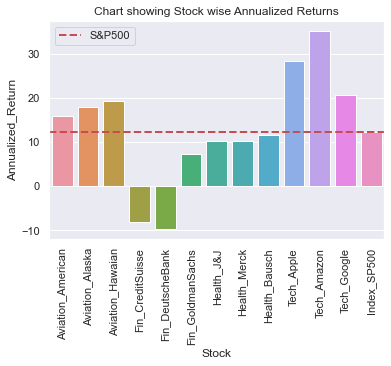

In [102]:
# Let us plot a bar chart of Annualized Return
sns.barplot(x="Stock",y="Annualized_Return",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,1], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Annualized Returns")
plt.show()

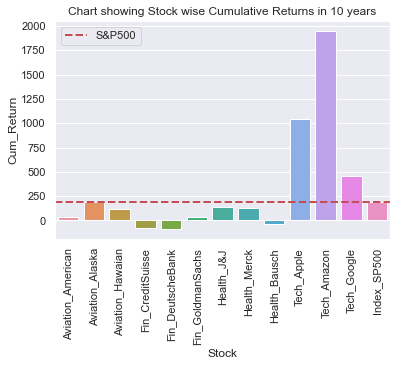

In [103]:
# Let us plot a bar chart of Cumulative Return
sns.barplot(x="Stock",y="Cum_Return",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,2], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Cumulative Returns in 10 years")
plt.show()

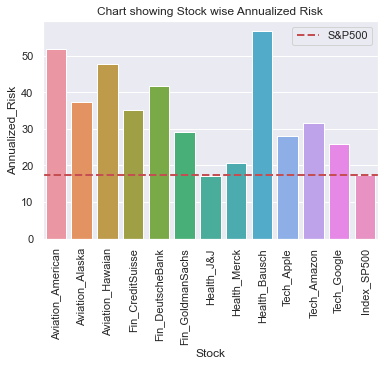

In [104]:
# Let us plot a bar chart of Annualized Risk
sns.barplot(x="Stock",y="Annualized_Risk",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,3], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Annualized Risk")
plt.show()

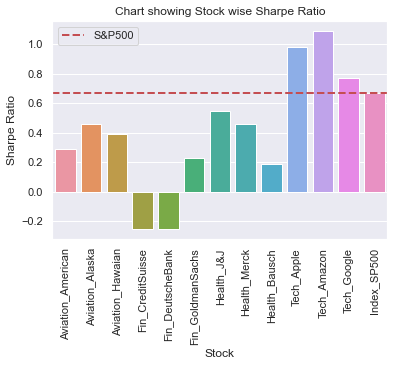

In [105]:
# Let us plot a bar chart of Sharpe ratio
sns.barplot(x="Stock",y="Sharpe Ratio",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,4], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Sharpe Ratio")
plt.show()

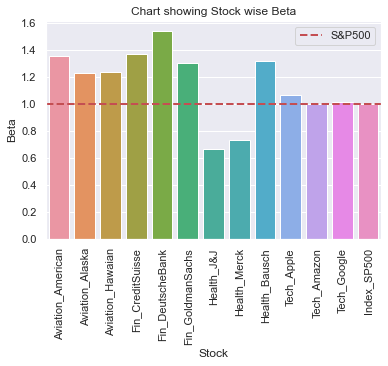

In [106]:
# Let us plot a bar chart of Beta
sns.barplot(x="Stock",y="Beta",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,5], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Beta")
plt.show()

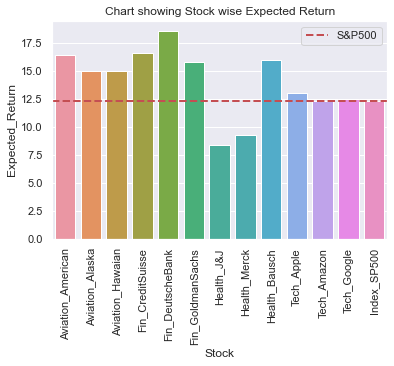

In [107]:
# Let us plot a bar chart of Expected Return
sns.barplot(x="Stock",y="Expected_Return",data=CAPM_df)
plt.axhline(CAPM_df.iloc[12,6], color = 'r', linestyle = 'dashed', linewidth = 2,label="S&P500")
plt.xticks(rotation=90)
plt.legend()
plt.title("Chart showing Stock wise Expected Return")
plt.show()

### The client is conservative and expects stable returns. Keeping this in mind, we have decided as below-

1.We can drop CreditSuisse and DeutscheBank as the Annualized and Cumulative Return is negative and the Beta is high indicating that the risk is very high.

2.Though BauschHealth has a Annualized Return of 11.7% ,we can drop the same as the cumulative return is negative.
Also it has a high Annualized Risk and low sharpe ratio.

3.Though expected return is higher than index for American Airlines and Goldmansachs as the cumulative return in last 10 years is 32-36% which is less than return on FDs.Hence we can drop the same.

4.J&J and Merck are below par the Market Index for all performance metrics.

5.Hawaian Airline is also not a good investment as the cum return is less than index.Also it has a high Annualized Risk and Beta value.

6.Though Alaska Airlines Expected Return is high we will not consider the same as the Beta value is high at 1.23.Also the prices have been dropping since 2018.Also it has a low Sharpe Ratio.

7.Technology Stocks - Apple, Amazon and Google are good options for the portfolio as the Beta value is around 1, annualized and cumulative returns are better than the market.Sharpe Ratio is high indicating that the returns are in line with the risk undertaken. 


#### We will build a portfolio with all Technology Stocks and see the returns

### Let us check the the Portfolio Beta and Expected Return for the portfolio under the below scenario

1.Portfolio consisting of three tech stocks- Apple,Amazon and Google

2.Portfolio consisting of Apple and Google stocks since the Beta value of Amazon is 0.99 and it has a high Annualized Risk


In [108]:
# Let us create a dataframe with Portfolio stocks
Portfolio1_Stocks=CAPM_df.loc[9:11,:]
Portfolio1_Stocks

Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
9    Tech_Apple              28.42     1047.77            28.13          0.98   
10  Tech_Amazon              35.22     1948.49            31.57          1.09   
11  Tech_Google              20.60      461.28            25.86          0.77   

        Beta  Expected_Return  
9   1.063349        13.031682  
10  0.998802        12.286167  
11  1.013338        12.454054

In [109]:
# let us consider equal weights ie investments will be made equally in each stock of the portfolio
weights1=np.array([1/3,1/3,1/3])

In [110]:
# Let us calculate the portfolio Beta
Portfolio1_Beta=np.sum(Portfolio1_Stocks["Beta"]*weights1)
Portfolio1_Beta

1.0251631438971838

In [111]:
# Let us calculate the Expected Return from the portfolio
Portfolio1_Expected_Return=0.75+Portfolio1_Beta*(Market_Return-0.75)
Portfolio1_Expected_Return

12.590634312012472

#### Let us build another Portfolio with only Apple and Google Stocks.

#### We will drop the Amazon Stock as the Beta value is less compared to Apple and Google but the Annualized Risk is more than Apple and Google 


In [112]:
# Portfolio with apple and google stock
Portfolio2_Stocks=CAPM_df.loc[[9,11],:]
Portfolio2_Stocks

Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
9    Tech_Apple              28.42     1047.77            28.13          0.98   
11  Tech_Google              20.60      461.28            25.86          0.77   

        Beta  Expected_Return  
9   1.063349        13.031682  
11  1.013338        12.454054

In [113]:
# Let us assign equal weights
weights2=np.array([0.5,0.5])

In [114]:
# Let us calculate the Beta value for this portfolio
Portfolio2_Beta=np.sum(Portfolio2_Stocks["Beta"]*weights2)
Portfolio2_Beta

1.0383435544080457

In [115]:
# Let us calculate the Expected Return from the portfolio
Portfolio2_Expected_Return=0.75+Portfolio2_Beta*(Market_Return-0.75)
Portfolio2_Expected_Return

12.742868053412929

#### Beta of the Portfolio is 1.0383 which means that the Portfolio achieves the requirement of the investor to be less risky

In [116]:
# calculate daily returns of portfolio.
Returns_Portfolio=Returns[["Tech_Apple_Return","Tech_Google_Return"]]
Returns_Portfolio["Portfolio_Return"]=Returns_Portfolio.dot(weights2)


In [117]:
# Let us calculate the mean daily return of the portolfio
Portfolio_Daily_Return=Returns_Portfolio["Portfolio_Return"].mean()
Portfolio_Daily_Return

0.0009725936763311218

In [118]:
# Portfolio Annualized Return
Portfolio_Annualized_Return=Portfolio_Daily_Return*252*100
Portfolio_Annualized_Return

24.509360643544266

In [119]:
# Let us calculative the portfolio cumulative return
Portfolio_Cumulative_Return=round(((1+Returns_Portfolio["Portfolio_Return"]).cumprod()[-1]-1)*100,2)
Portfolio_Cumulative_Return

774.57

In [120]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = Returns_Portfolio.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

Tech_Apple_Return  Tech_Google_Return
Tech_Apple_Return            0.079115            0.038189
Tech_Google_Return           0.038189            0.066854

In [121]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(weights2.T,np.dot(covariance_portfolio, weights2))

In [122]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)*100
portfolio_risk

23.576849902662143

In [123]:
# Portfolio Sharpe Ratio
Portfolio_Sharpe_Ratio=(Portfolio_Annualized_Return-0.75)/portfolio_risk
Portfolio_Sharpe_Ratio

1.007741099495294

In [124]:
# Summary of Portfolio stocks with Index
Portfolio_Summary=Portfolio2_Stocks
Portfolio_Summary



Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
9    Tech_Apple              28.42     1047.77            28.13          0.98   
11  Tech_Google              20.60      461.28            25.86          0.77   

        Beta  Expected_Return  
9   1.063349        13.031682  
11  1.013338        12.454054

In [125]:
#dictionary of all metrics of the Portfolio
Portfolio_metrics={"Stock":"Portfolio","Annualized_Return":round(Portfolio_Annualized_Return,2),"Cum_Return":Portfolio_Cumulative_Return,
                   "Annualized_Risk":round(portfolio_risk,2),"Sharpe Ratio":round(Portfolio_Sharpe_Ratio,2),"Beta":Portfolio2_Beta,"Expected_Return":Portfolio2_Expected_Return,}
Portfolio_metrics



{'Stock': 'Portfolio',
 'Annualized_Return': 24.51,
 'Cum_Return': 774.57,
 'Annualized_Risk': 23.58,
 'Sharpe Ratio': 1.01,
 'Beta': 1.0383435544080457,
 'Expected_Return': 12.742868053412929}

In [126]:
# appending the same to Portfolio summary for comparison
Portfolio_Summary=Portfolio_Summary.append(Portfolio_metrics,ignore_index=True) 
Portfolio_Summary

Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
0   Tech_Apple              28.42     1047.77            28.13          0.98   
1  Tech_Google              20.60      461.28            25.86          0.77   
2    Portfolio              24.51      774.57            23.58          1.01   

       Beta  Expected_Return  
0  1.063349        13.031682  
1  1.013338        12.454054  
2  1.038344        12.742868

In [127]:
Portfolio_Summary=Portfolio_Summary.append(CAPM_df.iloc[12,:],ignore_index=True)
Portfolio_Summary

Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
0   Tech_Apple              28.42     1047.77            28.13          0.98   
1  Tech_Google              20.60      461.28            25.86          0.77   
2    Portfolio              24.51      774.57            23.58          1.01   
3  Index_SP500              12.30      193.39            17.36          0.67   

       Beta  Expected_Return  
0  1.063349        13.031682  
1  1.013338        12.454054  
2  1.038344        12.742868  
3  1.000000        12.300000

### Conclusion

### We will go ahead with the portfolio consisting of Apple and Google Stocks as the Expected Return(12.74%)  is better than previous portfolio comprising of three technology stocks(12.59%). Sharpe ratio is also higher than 1 

### 5.Stock Price Prediction - Validation

### 5.1 Data Preparation

Now that we have decided on the stocks to include in the Portfolio, let us consolidate all the data related to these stocks- Price, Volume, Normalized Price, Return and Relative Strength.

In [128]:
# Let us create a list of Dataframes to be merged
df_list2=[merged_df,Returns,Relative_Strength]
# Let us have the Dataframe for Portfolio Stocks-Apple and Google
# Let us merge all the Dataframes.
Portfolio_df=reduce(lambda left,right:pd.merge(left,right,on=["Date"],how="outer"),df_list2)
Portfolio_df.head()

Aviation_American_Price  Aviation_Alaska_Price  \
Date                                                         
2010-10-01                     9.29                12.4475   
2010-10-04                     9.12                12.1425   
2010-10-05                     9.23                12.2150   
2010-10-06                     9.23                12.1875   
2010-10-07                     9.24                11.6250   

            Aviation_Hawaian_Price  Fin_CreditSuisse_Price  \
Date                                                         
2010-10-01                    5.96               42.226563   
2010-10-04                    5.75               41.914063   
2010-10-05                    5.85               43.154297   
2010-10-06                    5.97               43.437500   
2010-10-07                    6.15               43.671875   

            Fin_DeutscheBank_Price  Fin_GoldmanSachs_Price  Health_J&J_Price  \
Date                                                                           
2010-10-01               52.595421              147.699997         61.750000   
2010-10-04               51.755726              146.570007         61.669998   
2010-10-05               53.950382              149.570007         62.799999   
2010-10-06               54.608780              150.839996         63.209999   
2010-10-07               54.036259              151.110001         63.220001   

            Health_Merck_Price  Health_Bausch_Price  Tech_Apple_Price  \
Date                                                                    
2010-10-01           36.599998            25.750000         10.090000   
2010-10-04           36.520000            25.870001          9.951428   
2010-10-05           37.020000            26.299999         10.319285   
2010-10-06           37.009998            26.690001         10.328215   
2010-10-07           36.709999            26.600000         10.329286   

            Tech_Amazon_Price  Tech_Google_Price  Index_SP500_Price  \
Date                                                                  
2010-10-01         153.710007         261.828613        1146.239990   
2010-10-04         155.389999         260.199707        1137.030029   
2010-10-05         160.869995         268.110046        1160.750000   
2010-10-06         155.399994         266.177307        1159.969971   
2010-10-07         156.270004         264.015411        1158.060059   

            Aviation_American_Volume  Aviation_Alaska_Volume  \
Date                                                           
2010-10-01                   3603800               1663600.0   
2010-10-04                   3856800               1512400.0   
2010-10-05                   3896600               2567200.0   
2010-10-06                   3230200               1043600.0   
2010-10-07                   3877700               7682400.0   

            Aviation_Hawaian_Volume  Fin_CreditSuisse_Volume  \
Date                                                           
2010-10-01                 645400.0                1814900.0   
2010-10-04                 618900.0                1085600.0   
2010-10-05                 534800.0                1025300.0   
2010-10-06                2563900.0                 871300.0   
2010-10-07                1115200.0                1377000.0   

            Fin_DeutscheBank_Volume  Fin_GoldmanSachs_Volume  \
Date                                                           
2010-10-01                2010600.0                7439800.0   
2010-10-04                1245600.0                5866700.0   
2010-10-05                2270900.0                8724700.0   
2010-10-06                1887400.0                6330600.0   
2010-10-07                1191000.0                4471500.0   

            Health_J&J_Volume  Health_Merck_Volume  Health_Bausch_Volume  \
Date                                                                       
2010-10-01          9773200.0           11741900.0             5778700.0

In [129]:
# Dropping columns that are not required
Portfolio_df.drop(['Aviation_American_Price', 'Aviation_Alaska_Price',
       'Aviation_Hawaian_Price', 'Fin_CreditSuisse_Price',
       'Fin_DeutscheBank_Price', 'Fin_GoldmanSachs_Price', 'Health_J&J_Price',
       'Health_Merck_Price', 'Health_Bausch_Price','Tech_Amazon_Price','Aviation_American_Volume', 'Aviation_Alaska_Volume',
       'Aviation_Hawaian_Volume', 'Fin_CreditSuisse_Volume',
       'Fin_DeutscheBank_Volume', 'Fin_GoldmanSachs_Volume',
       'Health_J&J_Volume', 'Health_Merck_Volume', 'Health_Bausch_Volume','Tech_Amazon_Volume','Aviation_American_Price_Normalized',
       'Aviation_Alaska_Price_Normalized', 'Aviation_Hawaian_Price_Normalized',
       'Fin_CreditSuisse_Price_Normalized',
       'Fin_DeutscheBank_Price_Normalized',
       'Fin_GoldmanSachs_Price_Normalized', 'Health_J&J_Price_Normalized',
       'Health_Merck_Price_Normalized', 'Health_Bausch_Price_Normalized','Tech_Amazon_Price_Normalized','Aviation_American_Return', 'Aviation_Alaska_Return',
       'Aviation_Hawaian_Return', 'Fin_CreditSuisse_Return',
       'Fin_DeutscheBank_Return', 'Fin_GoldmanSachs_Return',
       'Health_J&J_Return', 'Health_Merck_Return', 'Health_Bausch_Return','Tech_Amazon_Return','Aviation_American_Price_RS','Aviation_Alaska_Price_RS', 'Aviation_Hawaian_Price_RS',
       'Fin_CreditSuisse_Price_RS', 'Fin_DeutscheBank_Price_RS',
       'Fin_GoldmanSachs_Price_RS', 'Health_J&J_Price_RS',
       'Health_Merck_Price_RS', 'Health_Bausch_Price_RS','Tech_Amazon_Price_RS'],axis=1,inplace=True)
Portfolio_df.shape

(2517, 15)

### 5.1.1 Correlation between Variables of Apple and Google Stock

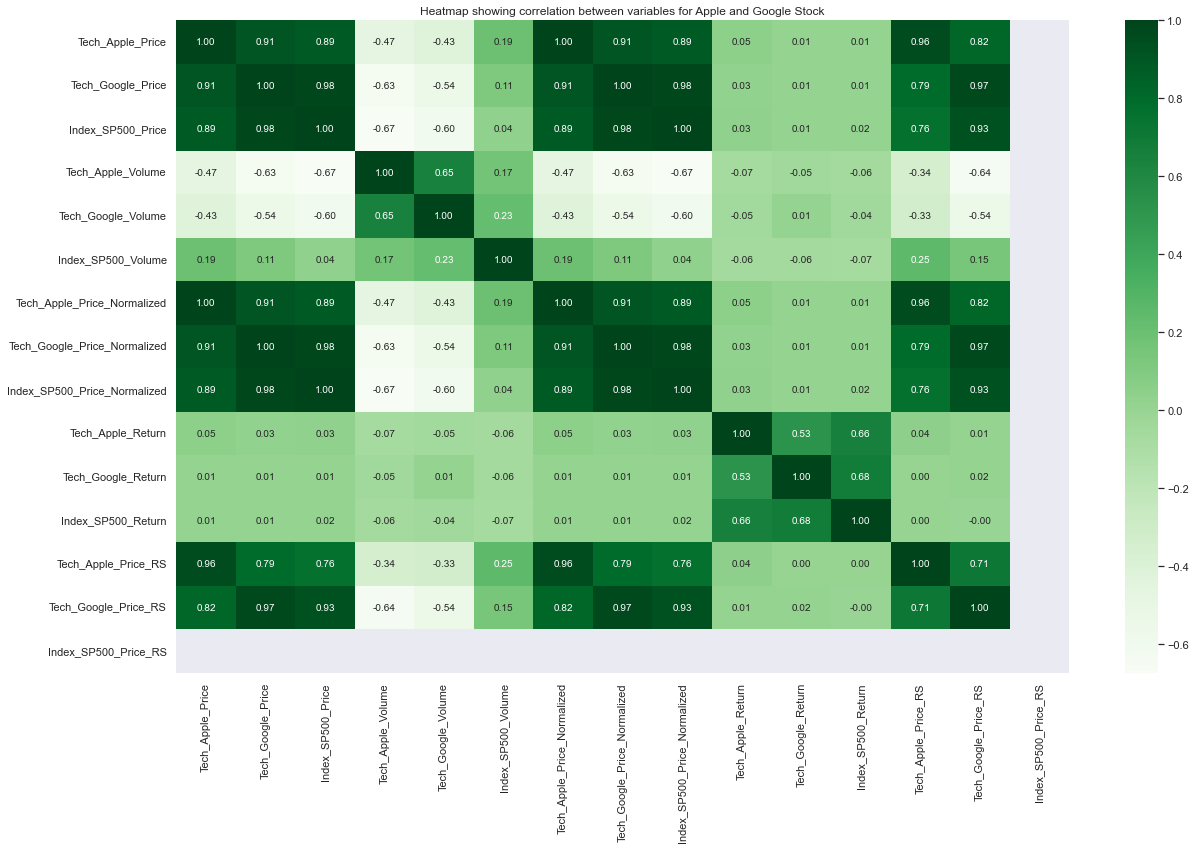

In [130]:
# Let us plot a heatmap to check the correlation among these variables
plt.figure(figsize=(20,12))
sns.heatmap(Portfolio_df.corr(),cmap="Greens",annot=True,fmt=".2f")
plt.title("Heatmap showing correlation between variables for Apple and Google Stock")
plt.show()

The Prices of both Apple and Google Stock show strong correlation with the Relative Stength.

Prices are perfectly positively correlated with Normalized Prices as expected.

Prices have a weak positive correlation with Return and weak negative correlation with Volume.

### 5.1.2 Granger Causality Tests

In [131]:
# Let us now check whether volume or relative strength actually cause change in price using Granger Causality Tests


In [132]:
# Let us apply granger causality test on price , relative stength and volume variables for apple and google stock separately.
print('Tech_Apple_Price_RS cause Tech_Apple_Price ?\n')
print('------------------')
granger_1 = grangercausalitytests(Portfolio_df[['Tech_Apple_Price', 'Tech_Apple_Price_RS']], 4)




Tech_Apple_Price_RS cause Tech_Apple_Price ?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6246  , p=0.4294  , df_denom=2513, df_num=1
ssr based chi2 test:   chi2=0.6253  , p=0.4291  , df=1
likelihood ratio test: chi2=0.6252  , p=0.4291  , df=1
parameter F test:         F=0.6246  , p=0.4294  , df_denom=2513, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=29.9064 , p=0.0000  , df_denom=2510, df_num=2
ssr based chi2 test:   chi2=59.9320 , p=0.0000  , df=2
likelihood ratio test: chi2=59.2291 , p=0.0000  , df=2
parameter F test:         F=29.9064 , p=0.0000  , df_denom=2510, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=24.0092 , p=0.0000  , df_denom=2507, df_num=3
ssr based chi2 test:   chi2=72.2287 , p=0.0000  , df=3
likelihood ratio test: chi2=71.2105 , p=0.0000  , df=3
parameter F test:         F=24.0092 , p=0.0000  , df_denom=2507, df_num=3

Granger Causality
numb

In [133]:
print('Tech_Apple_Volume cause Tech_Apple_Price ?\n')
print('------------------')
granger_1 = grangercausalitytests(Portfolio_df[['Tech_Apple_Price', 'Tech_Apple_Volume']], 20)



Tech_Apple_Volume cause Tech_Apple_Price ?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0389  , p=0.8437  , df_denom=2513, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8436  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8436  , df=1
parameter F test:         F=0.0389  , p=0.8437  , df_denom=2513, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0248  , p=0.9755  , df_denom=2510, df_num=2
ssr based chi2 test:   chi2=0.0497  , p=0.9755  , df=2
likelihood ratio test: chi2=0.0497  , p=0.9755  , df=2
parameter F test:         F=0.0248  , p=0.9755  , df_denom=2510, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1380  , p=0.9374  , df_denom=2507, df_num=3
ssr based chi2 test:   chi2=0.4150  , p=0.9371  , df=3
likelihood ratio test: chi2=0.4150  , p=0.9371  , df=3
parameter F test:         F=0.1380  , p=0.9374  , df_denom=2507, df_num=3

Granger Causality
number

In [134]:

print('Tech_Google_Price_RS cause Tech_Google_Price ?\n')
print('------------------')
granger_1 = grangercausalitytests(Portfolio_df[['Tech_Google_Price', 'Tech_Google_Price_RS']], 4)

Tech_Google_Price_RS cause Tech_Google_Price ?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2760  , p=0.5994  , df_denom=2513, df_num=1
ssr based chi2 test:   chi2=0.2764  , p=0.5991  , df=1
likelihood ratio test: chi2=0.2764  , p=0.5991  , df=1
parameter F test:         F=0.2760  , p=0.5994  , df_denom=2513, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.1705 , p=0.0000  , df_denom=2510, df_num=2
ssr based chi2 test:   chi2=40.4214 , p=0.0000  , df=2
likelihood ratio test: chi2=40.1000 , p=0.0000  , df=2
parameter F test:         F=20.1705 , p=0.0000  , df_denom=2510, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.9203 , p=0.0000  , df_denom=2507, df_num=3
ssr based chi2 test:   chi2=62.9361 , p=0.0000  , df=3
likelihood ratio test: chi2=62.1612 , p=0.0000  , df=3
parameter F test:         F=20.9203 , p=0.0000  , df_denom=2507, df_num=3

Granger Causality
nu

In [135]:
print('Tech_Volume cause Tech_Google_Price ?\n')
print('------------------')
granger_1 = grangercausalitytests(Portfolio_df[['Tech_Google_Price', 'Tech_Google_Volume']], 20)


Tech_Volume cause Tech_Google_Price ?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9524  , p=0.3292  , df_denom=2513, df_num=1
ssr based chi2 test:   chi2=0.9535  , p=0.3288  , df=1
likelihood ratio test: chi2=0.9534  , p=0.3289  , df=1
parameter F test:         F=0.9524  , p=0.3292  , df_denom=2513, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3225  , p=0.2667  , df_denom=2510, df_num=2
ssr based chi2 test:   chi2=2.6502  , p=0.2658  , df=2
likelihood ratio test: chi2=2.6489  , p=0.2660  , df=2
parameter F test:         F=1.3225  , p=0.2667  , df_denom=2510, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8797  , p=0.4508  , df_denom=2507, df_num=3
ssr based chi2 test:   chi2=2.6463  , p=0.4494  , df=3
likelihood ratio test: chi2=2.6450  , p=0.4497  , df=3
parameter F test:         F=0.8797  , p=0.4508  , df_denom=2507, df_num=3

Granger Causality
number of l

**Relative Strength of Apple and Google causes change in prices, Hence we will use these two variables for building the model.**

**As per granger causality tests, Volume does not cause change in prices, so we will not consider the same for building the model.**

In [136]:
# Retaining only the columns required for building the model
Portfolio_df.drop(['Index_SP500_Price','Tech_Apple_Volume', 'Tech_Google_Volume', 'Index_SP500_Volume',
                   'Tech_Apple_Price_Normalized', 'Tech_Google_Price_Normalized','Index_SP500_Price_Normalized',
                   'Tech_Apple_Return','Tech_Google_Return', 'Index_SP500_Return','Index_SP500_Price_RS'],
                  axis=1,inplace=True)

In [137]:
Portfolio_df.head()

Tech_Apple_Price  Tech_Google_Price  Tech_Apple_Price_RS  \
Date                                                                   
2010-10-01         10.090000         261.828613             0.008803   
2010-10-04          9.951428         260.199707             0.008752   
2010-10-05         10.319285         268.110046             0.008890   
2010-10-06         10.328215         266.177307             0.008904   
2010-10-07         10.329286         264.015411             0.008919   

            Tech_Google_Price_RS  
Date                              
2010-10-01              0.228424  
2010-10-04              0.228842  
2010-10-05              0.230980  
2010-10-06              0.229469  
2010-10-07              0.227981

### 5.2 Decomposition of Data

Let us decompose the data to see the trend, seasonality and residuals

### 5.2.1 Additive Seasonal Decomposition

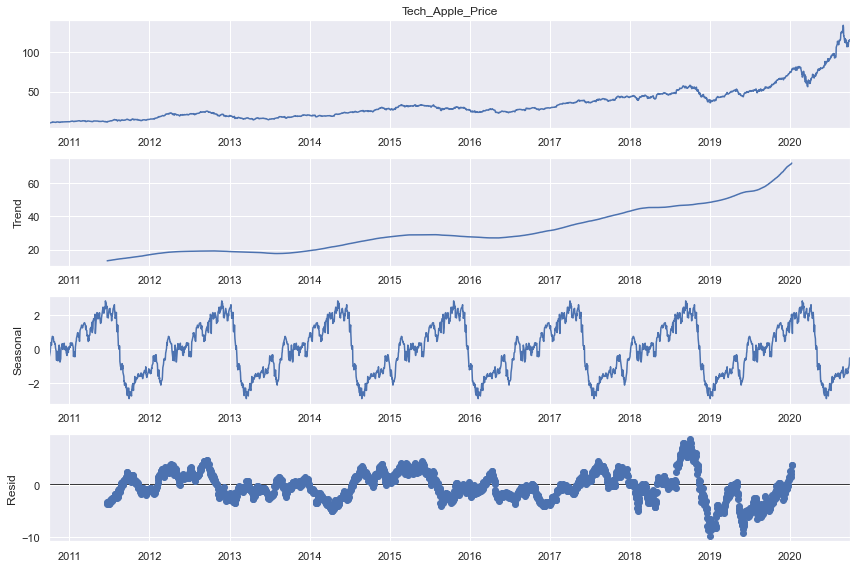

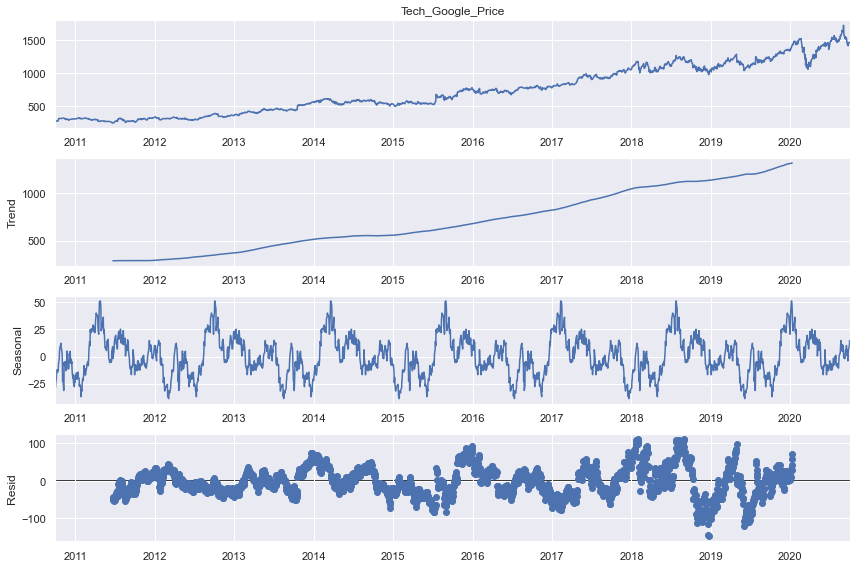

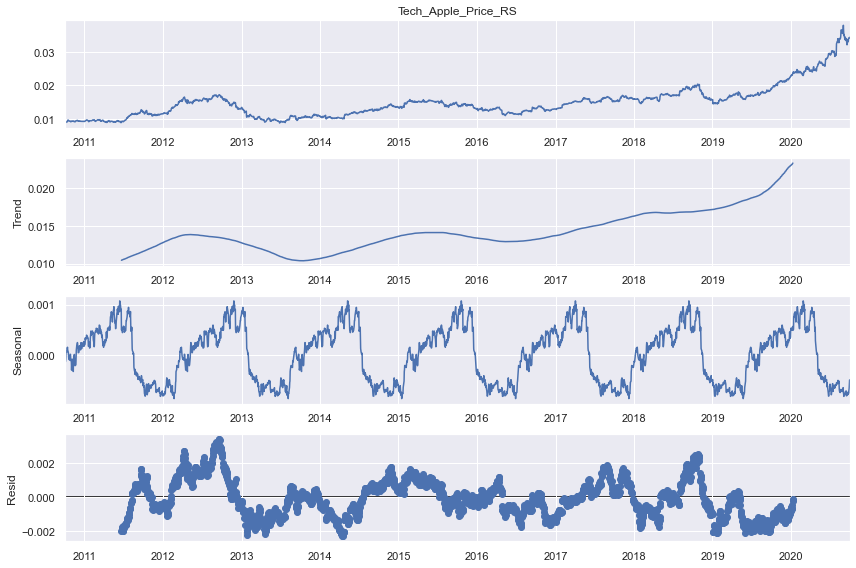

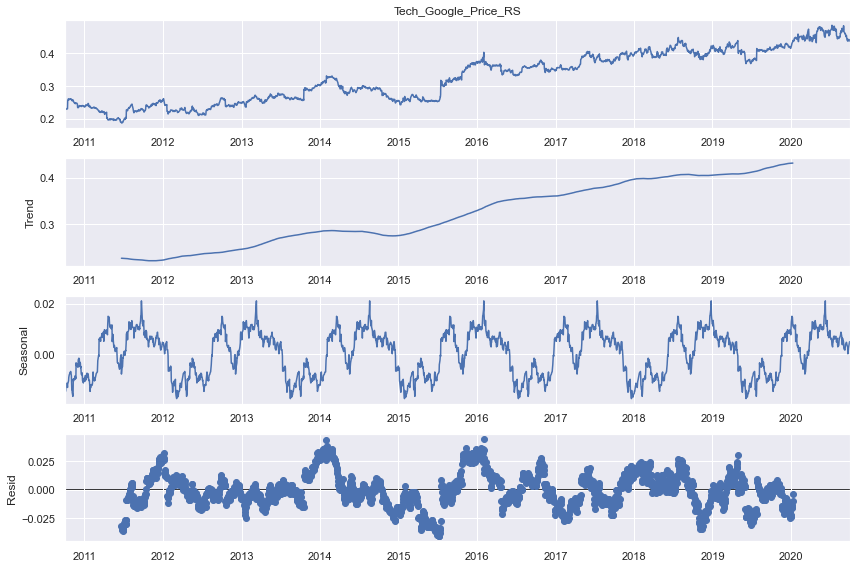

In [138]:
from pylab import rcParams
for i in Portfolio_df.columns:
    rcParams["figure.figsize"]=12,8
    decomposition=sm.tsa.seasonal_decompose(Portfolio_df[i],model="additive",period=365)
    fig=decomposition.plot()
    plt.show()

### 5.2.2 Multiplicative Seasonal Decomposition

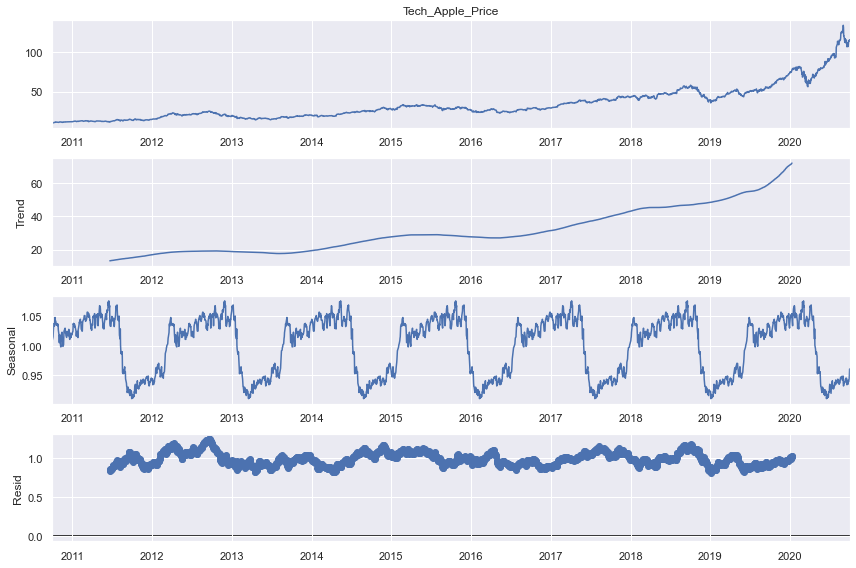

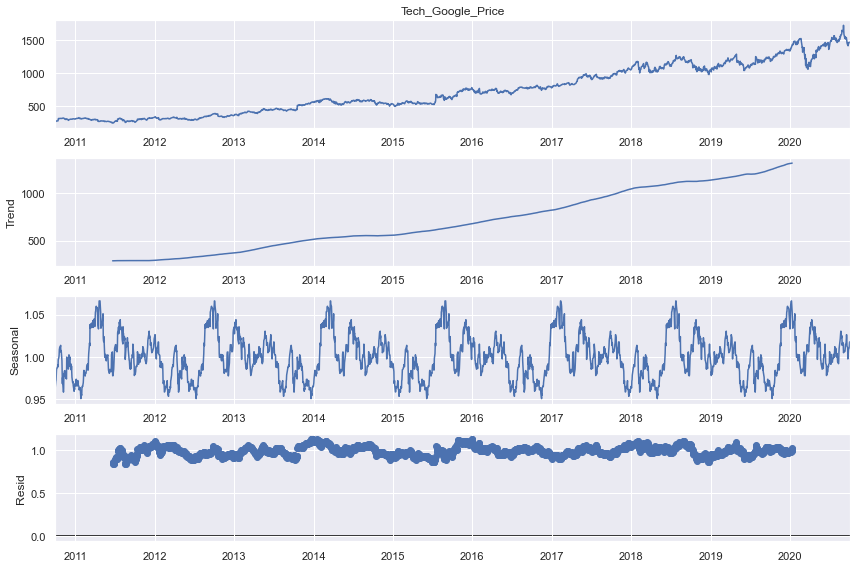

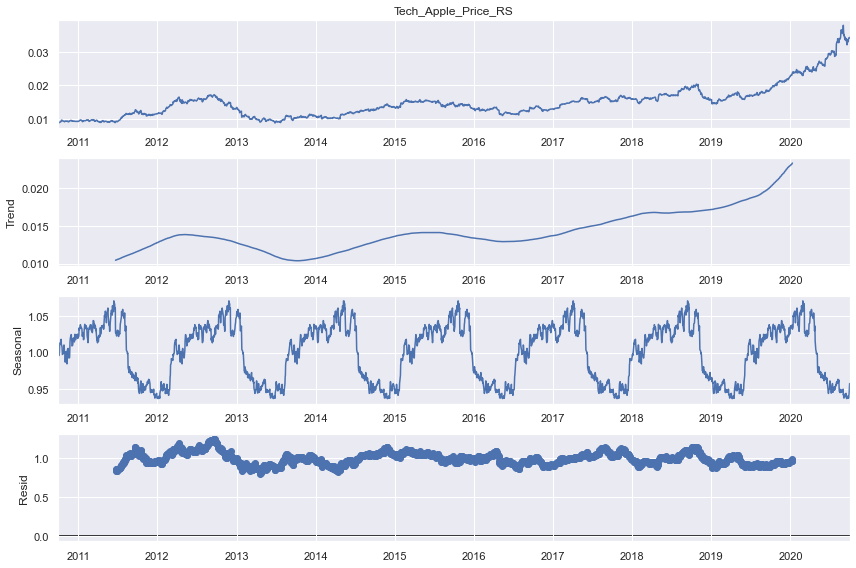

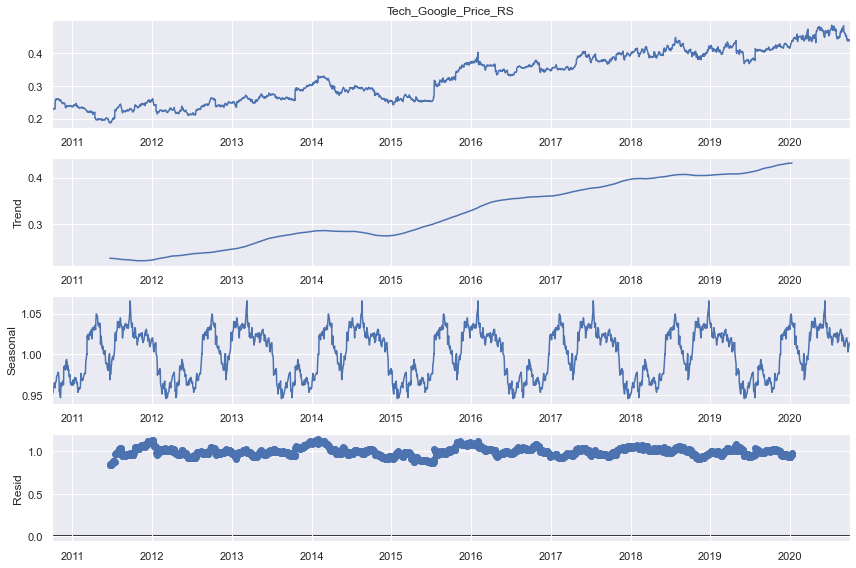

In [139]:
for i in Portfolio_df.columns:
    rcParams["figure.figsize"]=12,8
    decomposition=sm.tsa.seasonal_decompose(Portfolio_df[i],model="multiplicative",period=365)
    fig=decomposition.plot()
    plt.show()

### Observation

1. Apple and Google Stocks have an upward trend.
2. Apple seasonality is slightly more than a year and for google its close to 1.5 years.


**For building a model on multi variate time series, we need to first perform the tests for stationarity and also check the lags in the data. So let us begin with the stationarity tests**

### 5.3 Stationarity Tests

### 5.3.1 Augmented Dickey-Fuller (ADF) test

In [140]:
# Let us check for stationarity using ADF test

for col in Portfolio_df.columns:
    adf_test = adfuller(Portfolio_df[col])
    
    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

Tech_Apple_Price
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------

Tech_Google_Price
ADF Statistic: 0.188378
Critical Values @ 0.05: -2.86
p-value: 0.971602

Series is Non-Stationary

--------------------------------------

Tech_Apple_Price_RS
ADF Statistic: 2.026591
Critical Values @ 0.05: -2.86
p-value: 0.998707

Series is Non-Stationary

--------------------------------------

Tech_Google_Price_RS
ADF Statistic: -1.027870
Critical Values @ 0.05: -2.86
p-value: 0.742964

Series is Non-Stationary

--------------------------------------



### 5.3.2 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [141]:
# Let us check for stationarity using KPSS test

for col in Portfolio_df.columns:
    kpss_test = kpss(Portfolio_df[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Tech_Apple_Price
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Tech_Google_Price
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Tech_Apple_Price_RS
KPSS Statistic: 4.704094
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Tech_Google_Price_RS
KPSS Statistic: 7.671904
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------



### Observation

**Both ADFuller and KPSS test show that the variables are non stationary. We have already seen that the variables are not normally distributed.
Let us use boxcox transformation to make variance constant**

### 5.3.3 Boxcox Transformation

In [142]:
#Boxcox transformation
data_boxcox = pd.DataFrame(columns=Portfolio_df.columns) 

for col in Portfolio_df.columns:
    temp_data = pd.Series(boxcox(Portfolio_df[col], lmbda=0), index = Portfolio_df.index, name = col)
    data_boxcox[col] = temp_data
    
data_boxcox.head()

Tech_Apple_Price  Tech_Google_Price  Tech_Apple_Price_RS  \
Date                                                                   
2010-10-01          2.311545           5.567690            -4.732697   
2010-10-04          2.297716           5.561449            -4.738459   
2010-10-05          2.334014           5.591398            -4.722807   
2010-10-06          2.334879           5.584163            -4.721270   
2010-10-07          2.334983           5.576007            -4.719518   

            Tech_Google_Price_RS  
Date                              
2010-10-01             -1.476552  
2010-10-04             -1.474725  
2010-10-05             -1.465424  
2010-10-06             -1.471987  
2010-10-07             -1.478494

Tech_Apple_Price after Box Cox transformation


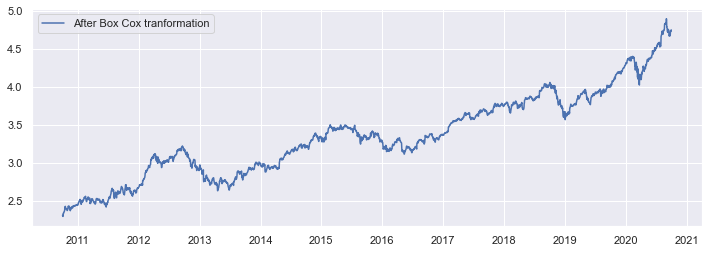

Tech_Google_Price after Box Cox transformation


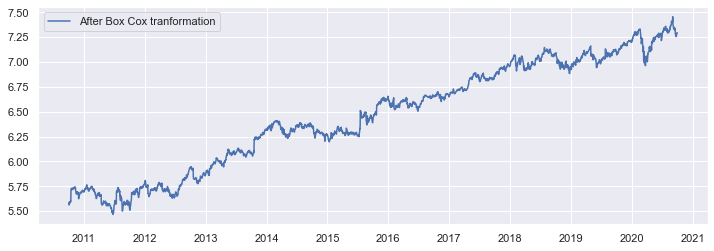

Tech_Apple_Price_RS after Box Cox transformation


Tech_Google_Price_RS after Box Cox transformation


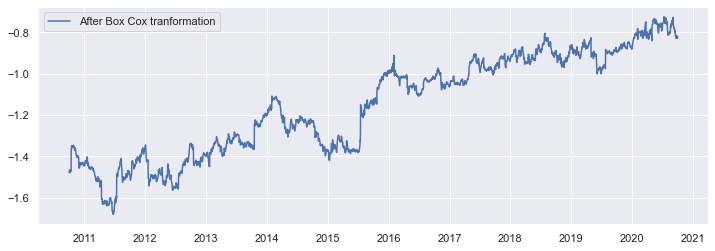

In [143]:
# Let us plot to see the data after boxcox transformation
for i in data_boxcox.columns:
    plt.figure(figsize=(12,4))
    plt.plot(data_boxcox[i], label='After Box Cox tranformation')
    plt.legend(loc='best')
    print(i,'after Box Cox transformation')
    plt.show()

### Observation

There exists a trend in the data, we will now work on removing the trend from the data by using differencing

### 5.3.4 Differencing

In [144]:
# Differencing the data
data_boxcox_diff = data_boxcox.diff() 
data_boxcox_diff

Tech_Apple_Price  Tech_Google_Price  Tech_Apple_Price_RS  \
Date                                                                   
2010-10-01               NaN                NaN                  NaN   
2010-10-04         -0.013829          -0.006241            -0.005761   
2010-10-05          0.036298           0.029948             0.015652   
2010-10-06          0.000865          -0.007235             0.001537   
2010-10-07          0.000104          -0.008155             0.001752   
...                      ...                ...                  ...   
2020-09-24          0.010216           0.009200             0.007233   
2020-09-25          0.036830           0.011604             0.020979   
2020-09-28          0.023588           0.013446             0.007606   
2020-09-29         -0.007597           0.003279            -0.002772   
2020-09-30          0.014963           0.000184             0.006743   

            Tech_Google_Price_RS  
Date                              
2010-10-01                   NaN  
2010-10-04              0.001827  
2010-10-05              0.009301  
2010-10-06             -0.006563  
2010-10-07             -0.006507  
...                          ...  
2020-09-24              0.006217  
2020-09-25             -0.004247  
2020-09-28             -0.002536  
2020-09-29              0.008103  
2020-09-30             -0.008036  

[2517 rows x 4 columns]

In [145]:
# let us drop the first row as the values as missing
data_boxcox_diff.dropna(inplace=True)

#### Stationarity check on the data after boxcox and differencing

In [146]:
# Let us check if the data is stationary after differencing
for col in data_boxcox_diff.columns:
    adf_test = adfuller(data_boxcox_diff[col])
    
    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

Tech_Apple_Price
ADF Statistic: -9.886806
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

--------------------------------------

Tech_Google_Price
ADF Statistic: -17.128416
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

--------------------------------------

Tech_Apple_Price_RS
ADF Statistic: -47.768079
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

--------------------------------------

Tech_Google_Price_RS
ADF Statistic: -36.047504
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

--------------------------------------



In [147]:
# let us also perform the KPSS test
for col in data_boxcox_diff.columns:
    kpss_test = kpss(data_boxcox_diff[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Tech_Apple_Price
KPSS Statistic: 0.119326
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------

Tech_Google_Price
KPSS Statistic: 0.016867
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------

Tech_Apple_Price_RS
KPSS Statistic: 0.213352
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------

Tech_Google_Price_RS
KPSS Statistic: 0.023682
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------



### Observation

Both ADF and KPSS tests show that the varaibles are stationary.

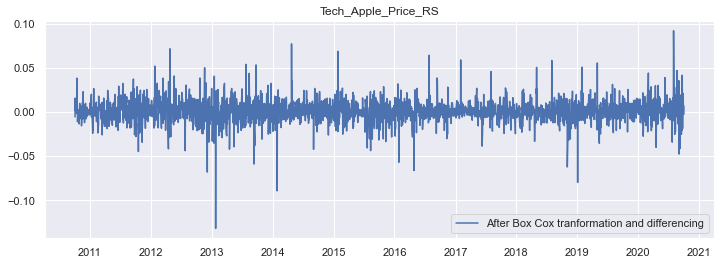

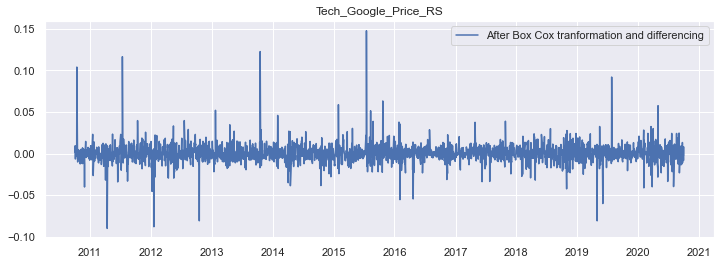

In [148]:
# Now that the data is stationary let us plot all data_differenced columns
for col in data_boxcox_diff.columns:   
    plt.figure(figsize=(12,4))
    plt.plot(data_boxcox_diff[col], label='After Box Cox tranformation and differencing')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

For building a Autogressive model, in addition to data stationarity,we also need to check for autocorrelation. Let us do that in the next step.

### 5.4 Autocorrelation

### 5.4.1 Auto Correlation Function (ACF)

Tech_Apple_Price ACF


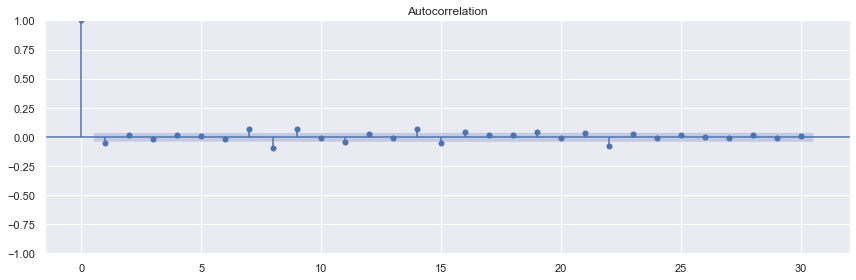

Tech_Google_Price ACF


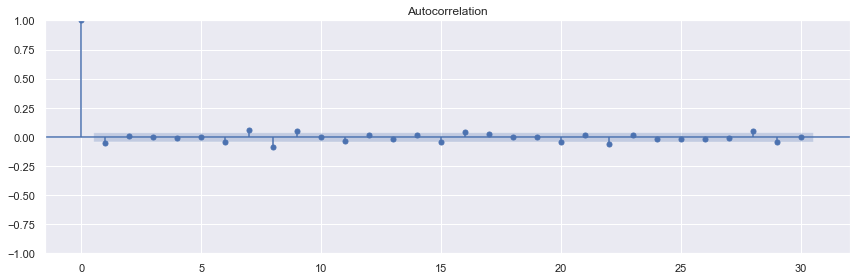

Tech_Apple_Price_RS ACF


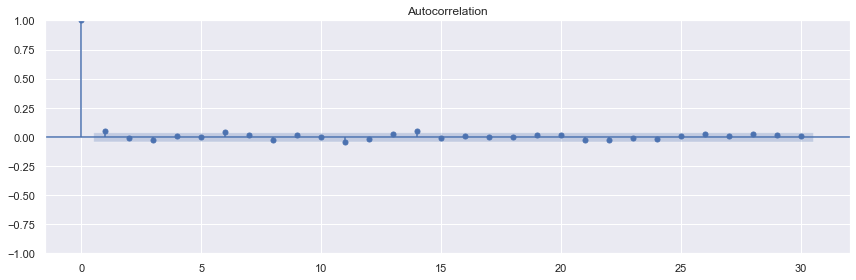

Tech_Google_Price_RS ACF


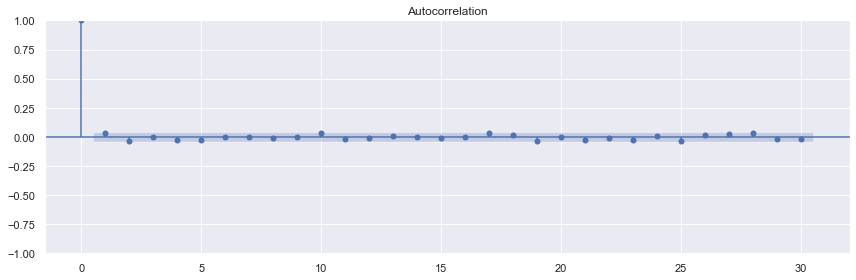

In [149]:
# Let us plot the ACF

for i in data_boxcox_diff.columns:

    plt.figure(figsize=(12,4))
    plot_acf(data_boxcox_diff[i], ax=plt.gca(), lags = 30)
    plt.tight_layout()
    print(i,"ACF")
    plt.show()

Apple Price and Google Price has a lag of 8 .Relative Strength lag is marginal for both stocks



### 5.4.2 Partial Auto Correlation Function (PACF)

Tech_Apple_Price


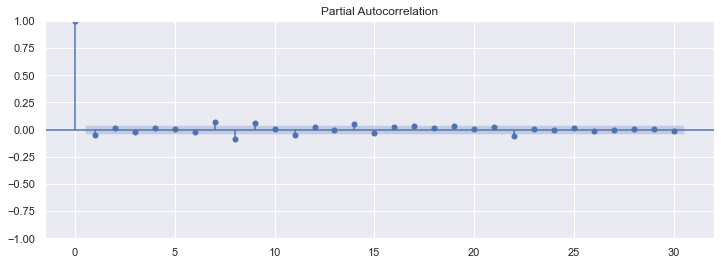

Tech_Google_Price


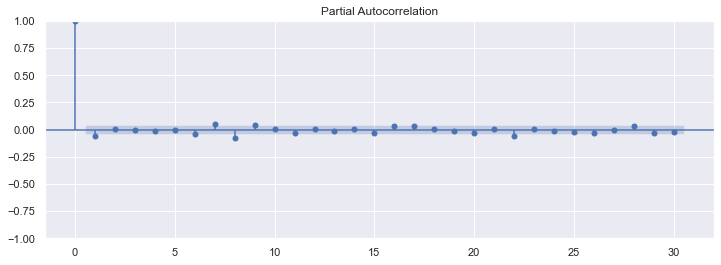

Tech_Apple_Price_RS


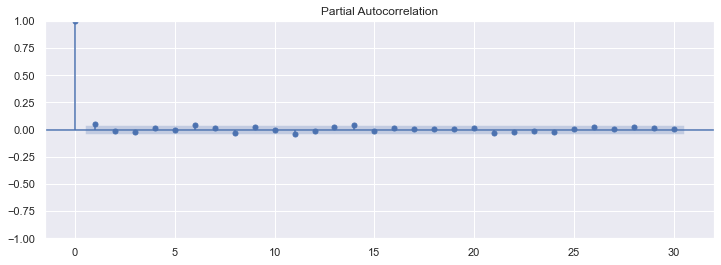

Tech_Google_Price_RS


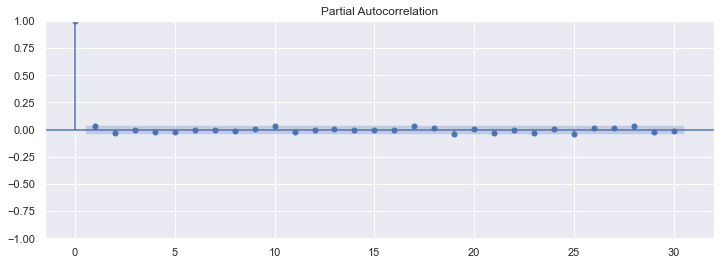

In [150]:
# let us plot the PACF

for i in data_boxcox_diff.columns:
    print(i)
    plt.figure(figsize=(12,4))
    plot_pacf(data_boxcox_diff[i], ax=plt.gca(), lags = 30)
    plt.show()

If we check the Partial Autocorrelation, Apple and Google Price have a lag of 8.

#### Now that the stationarity and Autocorrelation tests are completed, we can now proceed with the next step of splitting the data into train and test and building the model

### 5.5 Train Test Split

In [151]:
# Let us split the data separately for apple and google stocks

In [152]:
# Apple data as is, after boxcox and and after boxcox and differencing
apple=Portfolio_df.loc[:,["Tech_Apple_Price","Tech_Apple_Price_RS"]]
apple_boxcox=data_boxcox.loc[:,["Tech_Apple_Price","Tech_Apple_Price_RS"]]
apple_boxcox_diff=data_boxcox_diff.loc[:,["Tech_Apple_Price","Tech_Apple_Price_RS"]]

# Google data as is, after boxcox and and after boxcox and differencing
google=Portfolio_df.loc[:,["Tech_Google_Price","Tech_Google_Price_RS"]]
google_boxcox=data_boxcox.loc[:,["Tech_Google_Price","Tech_Google_Price_RS"]]
google_boxcox_diff=data_boxcox_diff.loc[:,["Tech_Google_Price","Tech_Google_Price_RS"]]



In [153]:
# Let us take the split of train and test data as 0.7 and 0.3 respectively.
train_len=int(Portfolio_df.shape[0]*0.7)
test_len = Portfolio_df.shape[0] - train_len

train_len,test_len

(1761, 756)

In [154]:
# Train and test data for Apple Stock. We will use differenced data as we have to build the model on that.
# Train data-differenced
train_apple_boxcox_diff = apple_boxcox_diff[:train_len-1]

# Test data - differenced
test_apple_boxcox_diff = apple_boxcox_diff[train_len-1:]

train_apple_boxcox_diff.shape,test_apple_boxcox_diff.shape

((1760, 2), (756, 2))

In [155]:
# Train and test data for Google Stock using differenced data
# Train data-differenced
train_google_boxcox_diff = google_boxcox_diff[:train_len-1]

# Test data - differenced
test_google_boxcox_diff = google_boxcox_diff[train_len-1:]

train_google_boxcox_diff.shape,test_google_boxcox_diff.shape

((1760, 2), (756, 2))

### We now have the train and test data for the two stocks. Let us build the model one by one. Let us start with the Apple Stock

### 5.6 Building and Evaluation of the Model - Apple

### 5.6.1 Building VAR Model on Apple Stock

In [156]:
apple.shape,apple_boxcox.shape,apple_boxcox_diff.shape

((2517, 2), (2517, 2), (2516, 2))

#### Since this is a multi variate data, we will build a VAR model

In [157]:
# Fitting the VAR model to the data
model_apple_1 = VAR(train_apple_boxcox_diff)

In [158]:
# To select the lag order
x = model_apple_1.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [159]:
# Providing maxlags as 5 (minimum AIC vaue)
results_apple_1 = model_apple_1.fit(maxlags = 5, ic = 'aic')

In [160]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results_apple_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, May, 2024
Time:                     09:02:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.9622
Nobs:                     1755.00    HQIC:                  -18.0055
Log likelihood:           10863.6    FPE:                1.47680e-08
AIC:                     -18.0308    Det(Omega_mle):     1.45846e-08
--------------------------------------------------------------------
Results for equation Tech_Apple_Price
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.000759         0.000382            1.989           0.047
L1.Tech_Apple_Price            0.003357         0.042153            0.080           0.937
L1.Tech_Apple

### 5.6.2 Predictions using VAR Model

In [161]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = results_apple_1.k_ar
lag_order

5

In [162]:
# Obtaining the predicted values
predicted_apple = results_apple_1.forecast(apple_boxcox_diff.values[-lag_order:],len(apple_boxcox_diff))

In [163]:
# Let us put the predictions in a Dataframe
forecast_apple_1 = pd.DataFrame(predicted_apple, index = apple_boxcox_diff.index, 
                        columns = apple_boxcox_diff.columns)


**The forecast values are on a different scale compared to the original series. Hence we will to reconvert the same to the same scale.**

#### Recovering forecast series

In [164]:
# We will recover the only the price data as that is what we need to predict.
forecast_apple_1["Tech_Apple_Price_Boxcox"]=forecast_apple_1["Tech_Apple_Price"].cumsum()
forecast_apple_1["Tech_Apple_Price_Boxcox"]=forecast_apple_1["Tech_Apple_Price_Boxcox"].add(apple_boxcox["Tech_Apple_Price"][0])
forecast_apple_1["Forecast_Tech_Apple_Price"]=np.exp(forecast_apple_1["Tech_Apple_Price_Boxcox"])
    

In [165]:
# Let us check the last few records
forecast_apple_1.tail()

Tech_Apple_Price  Tech_Apple_Price_RS  Tech_Apple_Price_Boxcox  \
Date                                                                         
2020-09-24          0.000737             0.000299                 4.162168   
2020-09-25          0.000737             0.000299                 4.162905   
2020-09-28          0.000737             0.000299                 4.163643   
2020-09-29          0.000737             0.000299                 4.164380   
2020-09-30          0.000737             0.000299                 4.165118   

            Forecast_Tech_Apple_Price  
Date                                   
2020-09-24                  64.210576  
2020-09-25                  64.257945  
2020-09-28                  64.305350  
2020-09-29                  64.352790  
2020-09-30                  64.400264

### 5.6.3 Compare Actual vs Predicted Returns

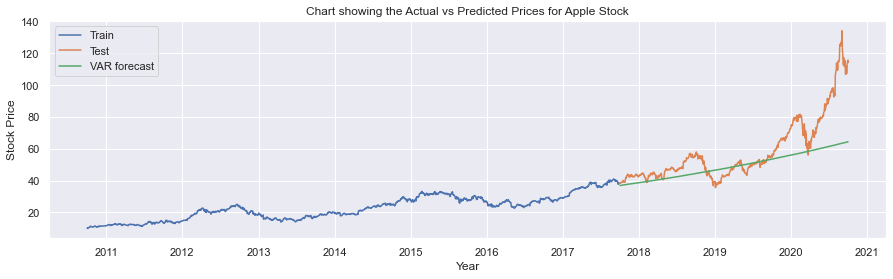

In [166]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(apple["Tech_Apple_Price"][:train_len], label='Train')
plt.plot(apple["Tech_Apple_Price"][train_len:], label='Test')
plt.plot(forecast_apple_1["Forecast_Tech_Apple_Price"][train_len:], label='VAR forecast')
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend(loc='best')
plt.title("Chart showing the Actual vs Predicted Prices for Apple Stock")
plt.show()

**The model shows a decent prediction, the anomaly in 2020 could be attributed to the pandemic. Let us check the evaluation metrics to see the model performance.**

### 5.6.4 VAR Model Evaluation 

In [167]:
# Model Evaluation


eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])


rmse = np.sqrt(mean_squared_error(apple["Tech_Apple_Price"][train_len:], 
                                  forecast_apple_1["Forecast_Tech_Apple_Price"][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(apple["Tech_Apple_Price"][train_len:]-
                    forecast_apple_1["Forecast_Tech_Apple_Price"][train_len-1:])/apple["Tech_Apple_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Tech_Apple_Price - VAR", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column   RMSE   MAPE
0  Tech_Apple_Price - VAR  16.61  14.55

### The Model built on Apple Stock looks to be a good model with low MAPE and RMSE.


### 5.6.5 Building ARIMA model on Apple Stock

In [168]:
# We need to have only the Price variable for the same.

In [169]:
# DataFrame with price data
apple_uni=pd.DataFrame(Portfolio_df["Tech_Apple_Price"])
apple_boxcox_uni=pd.DataFrame(apple_boxcox["Tech_Apple_Price"])

In [170]:
# train test split of apple stock price
train_apple_boxcox_uni=apple_boxcox["Tech_Apple_Price"][:train_len]
test_apple_boxcox_uni=apple_boxcox["Tech_Apple_Price"][train_len:]
train_apple_boxcox_uni.shape,test_apple_boxcox_uni.shape

((1761,), (756,))

In [171]:
# building the ARIMA Model
model_apple_2 = ARIMA(train_apple_boxcox_uni, order=(8, 1, 8))
results_apple_2 = model_apple_2.fit()
print(results_apple_2.params)

ar.L1     0.069304
ar.L2    -0.290278
ar.L3     0.402537
ar.L4     0.276734
ar.L5    -0.106262
ar.L6     0.108002
ar.L7    -0.097760
ar.L8    -0.105389
ma.L1    -0.046053
ma.L2     0.278324
ma.L3    -0.432946
ma.L4    -0.262077
ma.L5     0.064431
ma.L6    -0.051383
ma.L7     0.091084
ma.L8     0.063114
sigma2    0.000249
dtype: float64


### 5.6.6 Predictions using ARIMA Model

In [172]:
# Obtaining the predicted values
predicted_apple_arima=pd.DataFrame()
predicted = results_apple_2.predict(start=1,end=len(apple_boxcox_uni) ,
                                    index=apple_boxcox.index,typ="levels")
predicted_apple_arima["Tech_Apple_Price_Differenced_Forecast"]=predicted


In [173]:
# bringing data to original scale
predicted_apple_arima["Forecast_Tech_Apple_Price"]=np.exp(predicted_apple_arima["Tech_Apple_Price_Differenced_Forecast"])
predicted_apple_arima.head()

Tech_Apple_Price_Differenced_Forecast  Forecast_Tech_Apple_Price
Date                                                                        
2010-10-01                               2.311545                  10.090000
2010-10-04                               2.297447                   9.948748
2010-10-05                               2.334965                  10.329102
2010-10-06                               2.334741                  10.326780
2010-10-07                               2.333464                  10.313602

### 5.6.7 Actual vs Predicted Returns

In [174]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(apple["Tech_Apple_Price"][:train_len], label='Train')
plt.plot(apple["Tech_Apple_Price"][train_len:], label='Test')
plt.plot(predicted_apple_arima["Forecast_Tech_Apple_Price"][train_len:], label='ARIMA forecast')
plt.legend(loc='best')
plt.title("Chart showing the price forecast of train, test and forecast for Apple Stock")
plt.show()

### 5.6.8 ARIMA Model Evaluation 

In [175]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(apple["Tech_Apple_Price"][train_len:], 
                                  predicted_apple_arima["Forecast_Tech_Apple_Price"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(apple["Tech_Apple_Price"][train_len:]-
                    predicted_apple_arima["Forecast_Tech_Apple_Price"][train_len:])/apple["Tech_Apple_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Tech_Apple_Price - ARIMA", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column   RMSE   MAPE
0    Tech_Apple_Price - VAR  16.61  14.55
0  Tech_Apple_Price - ARIMA  28.24  28.29

### 5.6.9 Building Holt's Method with Trend

In [176]:
# For holts method with trend, we need the train and test data on original scale. Lets take the train and test data accordingly
train_apple_uni=apple_uni[:train_len]

test_apple_uni=apple_uni[train_len:]

train_apple_uni.shape,test_apple_uni.shape


((1761, 1), (756, 1))

In [177]:
# Building the model
model = ExponentialSmoothing(np.asarray(train_apple_uni['Tech_Apple_Price']) ,seasonal_periods=545 ,trend='additive', seasonal=None)
model_apple_3 = model.fit( optimized=True)
print(model_apple_3.params)



{'smoothing_level': 0.9999999850988376, 'smoothing_trend': 5.045002250965071e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 10.073960640250402, 'initial_trend': 0.016039776109423406, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### 5.6.10 Predictions using Holt's Method 

In [178]:
# Obtaining predictions on test data
predicted_apple_holt = test_apple_uni.copy()
predicted_apple_holt['holt_forecast'] = model_apple_3.forecast(len(test_apple_uni))

### 5.6.11 Compare Actual Vs Predicted

In [179]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(apple["Tech_Apple_Price"][:train_len], label='Train')
plt.plot(apple["Tech_Apple_Price"][train_len:], label='Test')
plt.plot(predicted_apple_holt["holt_forecast"][:], label='Holts Trend forecast')
plt.legend(loc='best')
plt.title("Chart showing the price forecast of train, test and forecast for Apple Stock")
plt.show()

### 5.6.12 Holt's Model Evaluation

In [180]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(apple["Tech_Apple_Price"][train_len:], 
                                  predicted_apple_holt["holt_forecast"][:])).round(2)
mape = np.round(np.mean(np.abs(apple["Tech_Apple_Price"][train_len:]-
                   predicted_apple_holt["holt_forecast"][:])/apple["Tech_Apple_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Tech_Apple_Price - Holts", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column   RMSE   MAPE
0    Tech_Apple_Price - VAR  16.61  14.55
0  Tech_Apple_Price - ARIMA  28.24  28.29
0  Tech_Apple_Price - Holts  22.19   19.6

### Conclusion

### VAR Model is a good model with a MAPE of 14.55 and RMSE of 16.61. Let us go ahead with this model for predictions for Apple Stock

### Let us now build a model on Google Stock

### 5.7 Building and Evaluating Model for Google Stock

### 5.7.1 Building VAR model for Google Stock

In [181]:
# let us list the Dataframes related to google
google.shape,google_boxcox.shape,google_boxcox_diff.shape

((2517, 2), (2517, 2), (2516, 2))

In [182]:
# building the VAR model
model_google_1 = VAR(train_google_boxcox_diff)

In [183]:
# To select the lag order
x = model_google_1.select_order(maxlags=20)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [184]:
# Providing maxlags as 8 (minimum AIC vaue)
results_google_1 = model_google_1.fit(maxlags = 8, ic = 'aic')

In [185]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results_google_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, May, 2024
Time:                     09:02:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.1547
Nobs:                     1752.00    HQIC:                  -18.2216
Log likelihood:           11058.5    FPE:                1.17332e-08
AIC:                     -18.2608    Det(Omega_mle):     1.15087e-08
--------------------------------------------------------------------
Results for equation Tech_Google_Price
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.000713         0.000360            1.982           0.048
L1.Tech_Google_Price            0.030448         0.039681            0.767           0.443
L1.Tech_

### 5.7.2 Predictions using VAR Model

In [186]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order_google = results_google_1.k_ar
lag_order_google

8

In [187]:
# Obtaining the predicted values
predicted_google = results_google_1.forecast(google_boxcox_diff.values[-lag_order_google:],len(google_boxcox_diff))

In [188]:
# storing predictions in a Dataframe
forecast_google_1 = pd.DataFrame(predicted_google, index = google_boxcox_diff.index, 
                        columns = google_boxcox_diff.columns)

**Since the forecasted values will be in differenced form, we need to recover the data to original form**

#### Recovering time series in original scale

In [189]:
# bringing data to original scale
forecast_google_1["Tech_Google_Price_Boxcox"]=forecast_google_1["Tech_Google_Price"].cumsum()
forecast_google_1["Tech_Google_Price_Boxcox"]=forecast_google_1["Tech_Google_Price_Boxcox"].add(google_boxcox["Tech_Google_Price"][0])
forecast_google_1["Forecast_Tech_Google_Price"]=np.exp(forecast_google_1["Tech_Google_Price_Boxcox"])


In [190]:
# Let us check the last few records after tranformation
forecast_google_1.tail()

Tech_Google_Price  Tech_Google_Price_RS  Tech_Google_Price_Boxcox  \
Date                                                                            
2020-09-24           0.000713              0.000282                  7.358356   
2020-09-25           0.000713              0.000282                  7.359069   
2020-09-28           0.000713              0.000282                  7.359782   
2020-09-29           0.000713              0.000282                  7.360496   
2020-09-30           0.000713              0.000282                  7.361209   

            Forecast_Tech_Google_Price  
Date                                    
2020-09-24                 1569.254319  
2020-09-25                 1570.373982  
2020-09-28                 1571.494443  
2020-09-29                 1572.615703  
2020-09-30                 1573.737764

### 5.7.3 Compare Actual Vs Predicted Prices

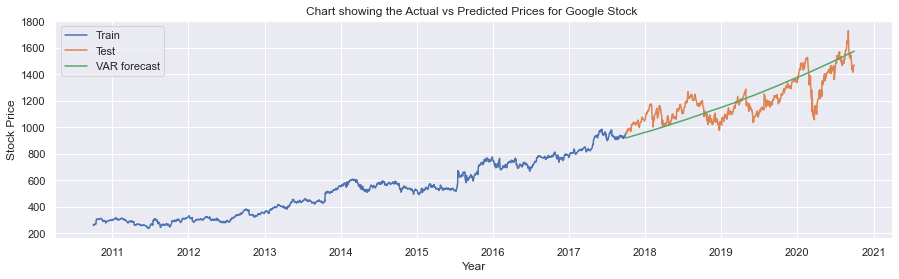

In [191]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(google["Tech_Google_Price"][:train_len], label='Train')
plt.plot(google["Tech_Google_Price"][train_len:], label='Test')
plt.plot(forecast_google_1["Forecast_Tech_Google_Price"][train_len:], label='VAR forecast')
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend(loc='best')
plt.title("Chart showing the Actual vs Predicted Prices for Google Stock ")
plt.show()

### 5.7.4 VAR Model Evaluation for Google Stock

In [192]:
rmse = np.sqrt(mean_squared_error(google["Tech_Google_Price"][train_len:], 
                                  forecast_google_1["Forecast_Tech_Google_Price"][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(google["Tech_Google_Price"][train_len:]-
                    forecast_google_1["Forecast_Tech_Google_Price"][train_len-1:])/google["Tech_Google_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Google_Price -VAR", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column    RMSE   MAPE
0    Tech_Apple_Price - VAR   16.61  14.55
0  Tech_Apple_Price - ARIMA   28.24  28.29
0  Tech_Apple_Price - Holts   22.19   19.6
0         Google_Price -VAR  105.76   7.41

### The model built on Google Stock to predict the Stock price also seems to be a decent model with low MAPE.

### Let us also build a couple of univariate time series models to compare the performance

### 5.7.5 Building ARIMA Model for Google Stock

In [193]:
# Let us get the dataframe for google price
google_uni=pd.DataFrame(Portfolio_df["Tech_Google_Price"])
google_boxcox_uni=pd.DataFrame(google_boxcox["Tech_Google_Price"])

In [194]:
# train and test split for google price
train_google_boxcox_uni=google_boxcox["Tech_Google_Price"][:train_len]
test_google_boxcox_uni=google_boxcox["Tech_Google_Price"][train_len:]
train_google_boxcox_uni.shape,test_google_boxcox_uni.shape

((1761,), (756,))

In [195]:
# building ARIMA model
model_google_2 = ARIMA(train_google_boxcox_uni, order=(8, 1, 8))
results_google_2 = model_google_2.fit()
print(results_google_2.params)

ar.L1     0.005697
ar.L2    -0.017401
ar.L3    -0.067010
ar.L4     0.135805
ar.L5     0.009423
ar.L6    -0.094971
ar.L7     0.107345
ar.L8     0.124400
ma.L1     0.019062
ma.L2     0.035470
ma.L3     0.032471
ma.L4    -0.136218
ma.L5    -0.034229
ma.L6     0.108735
ma.L7    -0.127520
ma.L8    -0.152493
sigma2    0.000220
dtype: float64


### 5.7.6 Predictions using ARIMA Model

In [196]:
# Obtaining the predicted values
predicted_google_arima=pd.DataFrame()
predicted = results_google_2.predict(start=1,end=len(google_boxcox_uni) ,
                                    index=google_boxcox.index,typ="levels")
predicted_google_arima["Tech_Google_Price_Differenced_Forecast"]=predicted
predicted_google_arima.head()

Tech_Google_Price_Differenced_Forecast
Date                                              
2010-10-01                                5.567690
2010-10-04                                5.561298
2010-10-05                                5.592007
2010-10-06                                5.584747
2010-10-07                                5.574602

In [197]:
# bringing data to original scale
predicted_google_arima["Forecast_Tech_Google_Price"]=np.exp(predicted_google_arima["Tech_Google_Price_Differenced_Forecast"])
predicted_google_arima.head()

Tech_Google_Price_Differenced_Forecast  Forecast_Tech_Google_Price
Date                                                                          
2010-10-01                                5.567690                  261.828613
2010-10-04                                5.561298                  260.160209
2010-10-05                                5.592007                  268.273485
2010-10-06                                5.584747                  266.332870
2010-10-07                                5.574602                  263.644473

### 5.6.7 Compare Actual vs Predicted Values

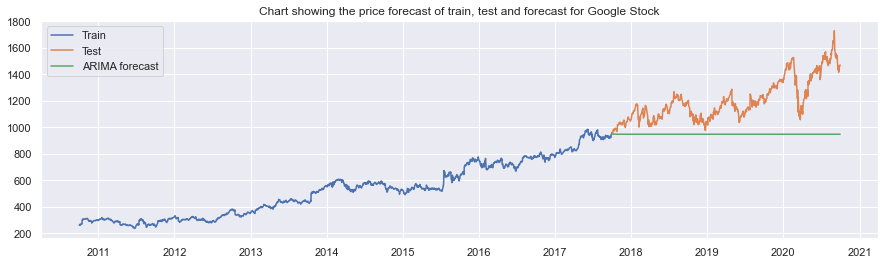

In [198]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(google["Tech_Google_Price"][:train_len], label='Train')
plt.plot(google["Tech_Google_Price"][train_len:], label='Test')
plt.plot(predicted_google_arima["Forecast_Tech_Google_Price"][train_len:], label='ARIMA forecast')
plt.legend(loc='best')
plt.title("Chart showing the price forecast of train, test and forecast for Google Stock")
plt.show()

### 5.7.8 ARIMA Model Evaluation

In [199]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(google["Tech_Google_Price"][train_len:], 
                                  predicted_google_arima["Forecast_Tech_Google_Price"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(google["Tech_Google_Price"][train_len:]-
                    predicted_google_arima["Forecast_Tech_Google_Price"][train_len:])/google["Tech_Google_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Tech_Google_Price - ARIMA", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column    RMSE   MAPE
0     Tech_Apple_Price - VAR   16.61  14.55
0   Tech_Apple_Price - ARIMA   28.24  28.29
0   Tech_Apple_Price - Holts   22.19   19.6
0          Google_Price -VAR  105.76   7.41
0  Tech_Google_Price - ARIMA  301.91  20.12

### 5.7.9 Holt's Model with Trend on google Stock

In [200]:
# For holts method with trend, we need to work on the data on original scale. Lets take the train and test data accordingly
train_google_uni=google_uni[:train_len]

test_google_uni=google_uni[train_len:]

train_google_uni.shape,test_google_uni.shape


((1761, 1), (756, 1))

In [201]:
# Building the model
model = ExponentialSmoothing(np.asarray(train_google_uni['Tech_Google_Price']) ,seasonal_periods=450 ,trend='additive', seasonal=None)
model_google_3 = model.fit( optimized=True)
print(model_google_3.params)

{'smoothing_level': 0.9947221636207375, 'smoothing_trend': 9.892957575351806e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 261.25834573798045, 'initial_trend': 0.403820189141714, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### 5.7.10 Predictions using Holt's Model

In [202]:
# Obtaining predicted values
predicted_google_holt = test_google_uni.copy()
predicted_google_holt['holt_forecast'] = model_google_3.forecast(len(test_google_uni))

### 5.7.11 Compare Actual Vs Predicted Values

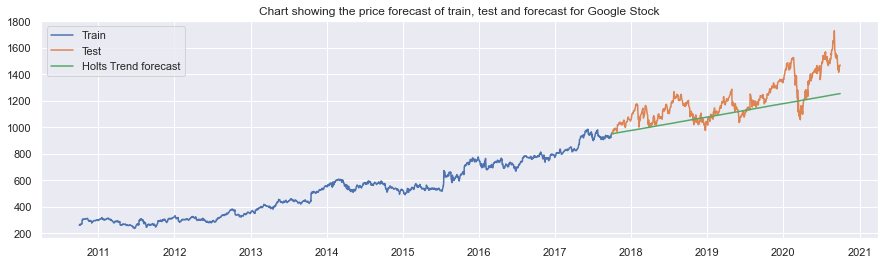

In [203]:
# Printing the train, test and forecasted values

plt.figure(figsize=(15,4))
plt.plot(google["Tech_Google_Price"][:train_len], label='Train')
plt.plot(google["Tech_Google_Price"][train_len:], label='Test')
plt.plot(predicted_google_holt["holt_forecast"][:], label='Holts Trend forecast')
plt.legend(loc='best')
plt.title("Chart showing the price forecast of train, test and forecast for Google Stock")
plt.show()

### 5.7.12 Holt's Model Evaluation

In [204]:
# Model Evaluation

rmse = np.sqrt(mean_squared_error(google["Tech_Google_Price"][train_len:], 
                                  predicted_google_holt["holt_forecast"][:])).round(2)
mape = np.round(np.mean(np.abs(google["Tech_Google_Price"][train_len:]-
                   predicted_google_holt["holt_forecast"][:])/google["Tech_Google_Price"][train_len:])*100,2)

tempResults = pd.DataFrame({'Column':"Tech_Google_Price - Holts", 'RMSE': [rmse],'MAPE': [mape] })
eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column    RMSE   MAPE
0     Tech_Apple_Price - VAR   16.61  14.55
0   Tech_Apple_Price - ARIMA   28.24  28.29
0   Tech_Apple_Price - Holts   22.19   19.6
0          Google_Price -VAR  105.76   7.41
0  Tech_Google_Price - ARIMA  301.91  20.12
0  Tech_Google_Price - Holts  143.37   8.72

### Conclusion:

### The VAR Model developed  for google stock is a good model with 7.41 MAPE and RMSE of 105.76.We can use this for future predictions

### 5.8 Future Predictions for Apple and Google Stock using VAR Model

**The prospective client wants the amount invested available after completion of study period of 4 years. So let us predict the values of Apple and Google stock for 4 years from Sep'20 to see the future returns it yields**

### 5.8.1 Future Annualised Returns from Apple Stock

In [205]:
# Let us use the VAR model to predict values for the period under analysis + 4 years considering 252 trading days per year.
n_forecast=252*4
future_apple = results_apple_1.forecast(apple_boxcox_diff.values[-lag_order:],len(apple_boxcox_diff)+n_forecast)

future_apple_df = pd.DataFrame(future_apple,
                        columns = apple_boxcox_diff.columns)

In [206]:
# bringing predictions to original scale
future_apple_df["Tech_Apple_Price_Boxcox"]=future_apple_df["Tech_Apple_Price"].cumsum()
future_apple_df["Tech_Apple_Price_Boxcox"]=future_apple_df["Tech_Apple_Price_Boxcox"].add(apple_boxcox["Tech_Apple_Price"][0])
future_apple_df["Forecast_Tech_Apple_Price"]=np.exp(future_apple_df["Tech_Apple_Price_Boxcox"])


In [207]:
# Let us retain the data for the 4 years from 30-09-2020 i.e last 1008 records
future_apple_df=future_apple_df.iloc[2516:,:]
future_apple_df.shape

(1008, 4)

In [208]:
#Let us calculate the daily returns for the 4 years
future_apple_return=future_apple_df["Forecast_Tech_Apple_Price"].pct_change().dropna()

In [209]:
# calculation for annualized return in the next 4 years.
future_apple_annualized_return=future_apple_return.mean()*252*100
future_apple_annualized_return

18.590680193410424

In [210]:
# Future cumulative Return
future_apple_cumulative_return=(future_apple_df["Forecast_Tech_Apple_Price"][3523]/future_apple_df["Forecast_Tech_Apple_Price"][2516]-1)*100
future_apple_cumulative_return

110.14248040899544

### 5.8.2 Future Annualised Returns from Google Stock

In [211]:
# Let us use the VAR model to predict values for the period under analysis + 4 years considering 252 trading days per year.
n_forecast=252*4
future_google = results_google_1.forecast(google_boxcox_diff.values[-lag_order_google:],len(google_boxcox_diff)+n_forecast)

future_google_df = pd.DataFrame(future_google,
                        columns = google_boxcox_diff.columns)

In [212]:
# bringing predictions to original scale
future_google_df["Tech_Google_Price_Boxcox"]=future_google_df["Tech_Google_Price"].cumsum()
future_google_df["Tech_Google_Price_Boxcox"]=future_google_df["Tech_Google_Price_Boxcox"].add(google_boxcox["Tech_Google_Price"][0])
future_google_df["Forecast_Tech_Google_Price"]=np.exp(future_google_df["Tech_Google_Price_Boxcox"])


In [213]:
# Let us retain the data for the 4 years from 30-09-2020 i.e last 1008 records
future_google_df=future_google_df.iloc[2516:,:]
future_google_df.shape

(1008, 4)

In [214]:
#Let us calculate the daily returns for the 4 years
future_google_return=future_google_df["Forecast_Tech_Google_Price"].pct_change().dropna()

In [215]:
# calculation for annualized return in the next 4 years.
future_google_annualized_return=future_google_return.mean()*252*100
future_google_annualized_return

17.980188546836988

In [216]:
# Future cumulative Return
future_google_cumulative_return=(future_google_df["Forecast_Tech_Google_Price"][3523]/future_google_df["Forecast_Tech_Google_Price"][2516]-1)*100
future_google_cumulative_return

105.08161617479743

### 5.8.3 Future Portfolio Return

In [217]:
#calculation of future annualized return for the portfolio proposed.
future_portfolio_return=future_apple_annualized_return*0.5+future_google_annualized_return*0.5
future_portfolio_return

18.285434370123706

### Conclusion:

### The proposed portfolio consisting of Apple and Google Stocks will give a return of 18.28 % YOY as predicted by the VAR Model.
### Since this is more than the current market return of 12.3%, it is a good portfolio.

### 6.Reporting and Conclusion

### The client Ms Alexa is very conservative and expects consistent stable returns from her investments. She wishes to utlise the funds to open an NGO to help sub Saharan African Region.Considering the financial goals and risk appetite of Ms Alexa, we recommend a Portfolio comprising of Apple and Google Stocks in equal proportion. 

### Below is a summary of the performance of the stocks and the Portfolio in comparsion with the Market:

### Performance Metrics of Portfolio Stocks and Portfolio vs Market Index S&P500

In [218]:
Portfolio_Summary

Stock  Annualized_Return  Cum_Return  Annualized_Risk  Sharpe Ratio  \
0   Tech_Apple              28.42     1047.77            28.13          0.98   
1  Tech_Google              20.60      461.28            25.86          0.77   
2    Portfolio              24.51      774.57            23.58          1.01   
3  Index_SP500              12.30      193.39            17.36          0.67   

       Beta  Expected_Return  
0  1.063349        13.031682  
1  1.013338        12.454054  
2  1.038344        12.742868  
3  1.000000        12.300000

#### Expected Returns of both Apple and Google Stocks are slightly above Market Index ,both have a Beta of 1.06 and 1.01 respectivly.
#### Both have performed consisitently over the years
#### The VAR model built for stock price prediction shows there will be a upward movement in the prices with MAPE of 14.55 and 7.41 for apple and google stock respectively.

### Portfolio:
#### Expected Returns from Portfolio is 12.74% slightly above Market and has a Sharpe ratio of 1.01 indicating the returns are in line with the risk undertaken.

### Future Returns from the Portfolio( 4 years from Sep 2020)
The Portfolio is expected to yield a Return of **18.28% yearly** based on the VAR model predictions in the next 4 years. With this the prospect will be able to meet her financial goal.